### Import the necessary libraries in pandas

In [174]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
sns.set(style='white')

### Import the datafile into pandas

In [175]:
data=pd.read_csv("/Users/vipulbhatia29/JupyterAnalytics/storedata/churn_prediction.csv")

### Eyeball the data

In [176]:
data.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
5,7,1923,42,Female,0.0,self_employed,1096.0,2,1666,15202.20,...,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01
6,8,2048,72,Male,0.0,retired,1020.0,1,1,7006.93,...,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24
7,9,2009,46,Male,0.0,self_employed,623.0,2,317,10096.58,...,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0,2019-07-12
8,10,2053,31,Male,0.0,salaried,1096.0,2,4110,1355.86,...,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0,2019-12-12
9,11,2295,40,Male,3.0,self_employed,1020.0,2,38,4957.95,...,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0,2019-12-31


In [177]:
data.describe(include="all")

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
count,28382.000000,28382.000000,28382.000000,27857,25919.000000,28302,27579.000000,28382.000000,28382.000000,2.838200e+04,...,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000,28382
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
freq,NaN,NaN,NaN,16548,NaN,17476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3223
mean,15143.508667,2091.144105,48.208336,NaN,0.347236,NaN,796.109576,2.225530,925.975019,7.380552e+03,...,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329,NaN
std,8746.454456,272.676775,17.807163,NaN,0.997661,NaN,432.872102,0.660443,937.799129,4.259871e+04,...,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571,NaN
min,1.000000,73.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,-5.503960e+03,...,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000,NaN
25%,7557.250000,1958.000000,36.000000,NaN,0.000000,NaN,409.000000,2.000000,176.000000,1.784470e+03,...,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000,NaN
50%,15150.500000,2154.000000,46.000000,NaN,0.000000,NaN,834.000000,2.000000,572.000000,3.281255e+03,...,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000,NaN
75%,22706.750000,2292.000000,60.000000,NaN,0.000000,NaN,1096.000000,3.000000,1440.000000,6.635820e+03,...,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000,NaN


### Describe the data:
Describe command shows the summary of the numeric data.
As you see below: 
* customer_id: the customer_id column is unique; 
* vintage is the age of the customer with the bank. Standard deviation is quite high.
* age is a continuous variable and the minimum value of the customer's age is 1 which does not make sense.
* dependents' maximum value is 52, which does not make sense.
* city show be a category
* customer_nw_category is a category
* branch_code is a category
* Current_balance to Previous_Month_Balance are continuous features
* Churn has a value of 0 or 1 (1: customer churned; 0: customer retained)


In [178]:
data.shape

(28382, 21)

In [179]:
data.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2091.144105,48.208336,0.347236,796.109576,2.225530,925.975019,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,272.676775,17.807163,0.997661,432.872102,0.660443,937.799129,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,73.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1958.000000,36.000000,0.000000,409.000000,2.000000,176.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2154.000000,46.000000,0.000000,834.000000,2.000000,572.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,2292.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,2476.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [180]:
data[data.dtypes[data.dtypes=="int64"].index]

,customer_id,vintage,age,customer_nw_category,branch_code,churn
0,1,2101,66,2,755,0
1,2,2348,35,2,3214,0
2,4,2194,31,2,41,0
3,5,2329,90,2,582,1
4,6,1579,42,3,388,1
...,...,...,...,...,...,...
28377,30297,2325,10,2,1207,0
28378,30298,1537,34,2,223,0
28379,30299,2376,47,2,588,1
28380,30300,1745,50,3,274,0


In [181]:
data[data.dtypes[data.dtypes=="float64"].index]

,dependents,city,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,0.0,187.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71
1,0.0,NaN,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61
2,0.0,146.0,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14
3,NaN,1020.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79
4,2.0,1494.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16
...,...,...,...,...,...,...,...,...,...,...,...,...
28377,0.0,1020.0,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43
28378,0.0,1046.0,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32
28379,0.0,1096.0,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24
28380,3.0,1219.0,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55


In [182]:
data[data.dtypes[data.dtypes=="object"].index]

,gender,occupation,last_transaction
0,Male,self_employed,2019-05-21
1,Male,self_employed,2019-11-01
2,Male,salaried,NaT
3,NaN,self_employed,2019-08-06
4,Male,self_employed,2019-11-03
...,...,...,...
28377,Female,student,2019-10-22
28378,Female,self_employed,2019-12-17
28379,Male,salaried,2019-12-31
28380,Male,self_employed,NaT


### Convert the datatypes

In [183]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

In [184]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [185]:
data["gender"]=data["gender"].astype("category")
data["occupation"]=data["occupation"].astype("category")
data["city"]=data["city"].astype("category")
data["customer_nw_category"]=data["customer_nw_category"].astype("category")
data["branch_code"]=data["branch_code"].astype("category")
#data["churn"]=data["churn"].astype("category")
data["dependents"]=data["dependents"].fillna(-1).astype("int")



In [186]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                           int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                                int64
last_transaction                    object
dtype: object

### DateTime

In [187]:
date=pd.DatetimeIndex(data['last_transaction'])

# last day of year when transaction was done
data['doy_ls_tran'] = date.dayofyear

# week of year when last transaction was done
data['woy_ls_tran'] = date.weekofyear

# month of year when last transaction was done
data['moy_ls_tran'] = date.month

# day of week when last transaction was done
data['dow_ls_tran'] = date.dayofweek

#drop last_transaction column
data=data.drop(['last_transaction'],axis=1)

In [188]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                           int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                                int64
doy_ls_tran                        float64
woy_ls_tran                        float64
moy_ls_tran                        float64
dow_ls_tran

In [189]:
numerical_columns=data.select_dtypes(include=['int64','float64']).columns

In [190]:
#segregate the continuous variables into groups to breakdown teh analysis
customer_details=['customer_id','vintage','age']
current_month=['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month=['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters=['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']

### Univariate Analysis: Continuous Variables
* Calculate Skew, Kurtosis and understand KDEPlots for the continuous variables
* Understand the spread of data

In [191]:
data['churn'].value_counts(normalize=True)
## only 18% of the data consists of customers which have churned

0    0.814671
1    0.185329
Name: churn, dtype: float64

In [192]:
def UVA_numeric(data, feature_set):
    ncols=len(feature_set)
    nrows=int(np.ceil(len(feature_set)/ncols))
    #fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(35,10))
    fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*len(feature_set),3),dpi=100)
    counter=0
    for i in range(nrows):
        for j in range(ncols):
            #ax=axes[i][j]
            ax=axes[j]
            max_c=data[feature_set[counter]].max()
            min_c=data[feature_set[counter]].min()
            range_c=max_c-min_c
            mean_c=data[feature_set[counter]].mean()
            median_c=data[feature_set[counter]].median()
            std_c=data[feature_set[counter]].std()
            skew_c=data[feature_set[counter]].skew()
            kurtosis_c=data[feature_set[counter]].kurtosis()
            
            #print([numerical_columns[counter]+ ": skew: " +str(data[data[numerical_columns].columns[counter]].skew()),"kurtosis: "+str(data[data[numerical_columns].columns[counter]].kurtosis())])
            #print(d_kurtosis=data[data[numerical_columns].columns[counter]].kurtosis())
            try:
                #sns.kdeplot(data[data[numerical_columns].columns[counter]],shade=True,ax=ax)
                sns.kdeplot(data[feature_set[counter]],shade=True,ax=ax)
            except:
                #ax.hist(data[data[numerical_columns[counter]]<=10][numerical_columns[counter]],bins=10)
                ax.hist(data[feature_set[counter]],bins=10)
            #sns.scatterplot([data[data[numerical_columns].columns[counter]].mean()],[0],color='red',label='mean',ax=ax)
            #sns.scatterplot([data[data[numerical_columns].columns[counter]].median()],[0],color='green',label='median',ax=ax)
            #sns.lineplot([data[data[numerical_columns].columns[counter]].mean()+data[data[numerical_columns].columns[counter]].std(),data[data[numerical_columns].columns[counter]].mean()-data[data[numerical_columns].columns[counter]].std()],[0,0],color='black',label='std',ax=ax)
            sns.scatterplot([data[feature_set[counter]].mean()],[0],color='red',label='mean',ax=ax)
            sns.scatterplot([data[feature_set[counter]].median()],[0],color='green',label='median',ax=ax)
            sns.lineplot([data[feature_set[counter]].mean()+data[feature_set[counter]].std(),data[feature_set[counter]].mean()-data[feature_set[counter]].std()],[0,0],label='std',color='black',ax=ax)
            #ax.text(3, 2, 'unicode: Institut für Festkörperphysik')
            ax.set_title('skew: {};  kurtosis: {};\nmean: {}; median: {};\nrange: {}; std_dev: {};'.format(round(skew_c,2),round(kurtosis_c,2),round(mean_c,2),round(median_c,2),(round(min_c,2),round(max_c,2),round(range_c,2)), round(std_c,2)    ),fontsize=10)
            ax.tick_params(axis='x',labelrotation=45)
            ax.set_xlabel(feature_set[counter],fontsize=10)
            ax.set_ylabel('probability density',fontsize=10)
            counter=counter+1
            
    #plt.legend()
    plt.show()

### Customer Information Analysis

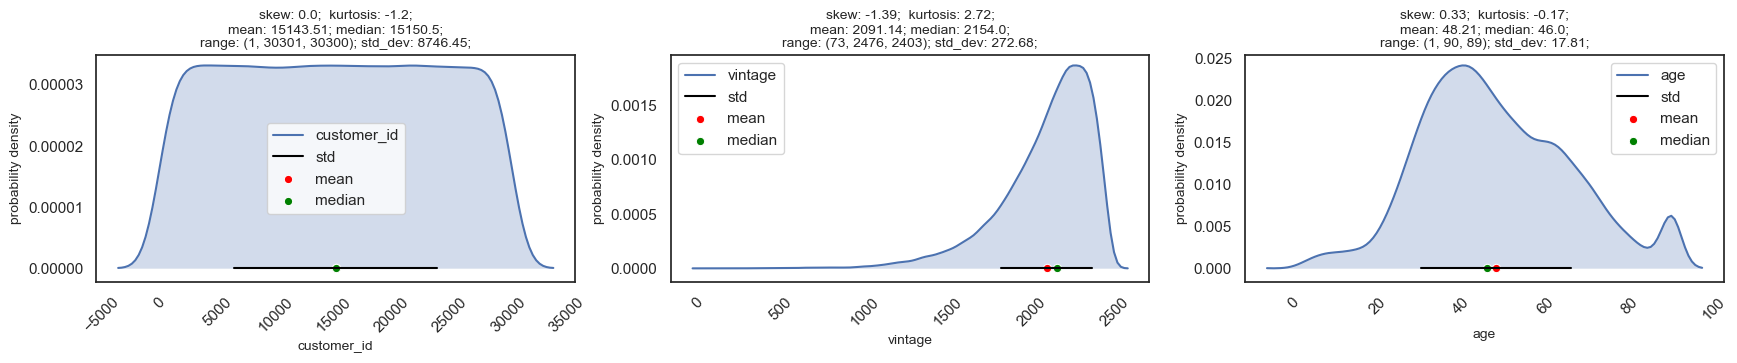

In [193]:
UVA_numeric(data,customer_details)

**Analysis/Insights from Customer_Information:**
*    **customer_id**:
     * variable is **unique for every customer, Hence uniform** distribution.
     * This variable **does not contribute any information**
     * Can be eliminated from data

*    **vintage:**
    *    Most customers joined between 1800 and 2375 days.
    *    **skewness** -1.39 : this is left skewed, **vintage variable is significantly biased towards longer association of customers.**
    *    **Kurtosis = 2.72**: Extreme values and Outliers are very likely to be present in vintage.

*    **age**:
    *    Median Age = 46
    *    **Most customers age between 30 to 66**
    *    skewness +0.33 : customer age is **very slightly biased towards younger age**
    *    **kurtosis = -0.17**; very less likely to have extreme/outlier values.


**Things to Investigate Further down the road:**
*    The batch of **high number of very aged (85-90 range at the extreme right of the graph) customers** in age variable.

### Current Month Analysis

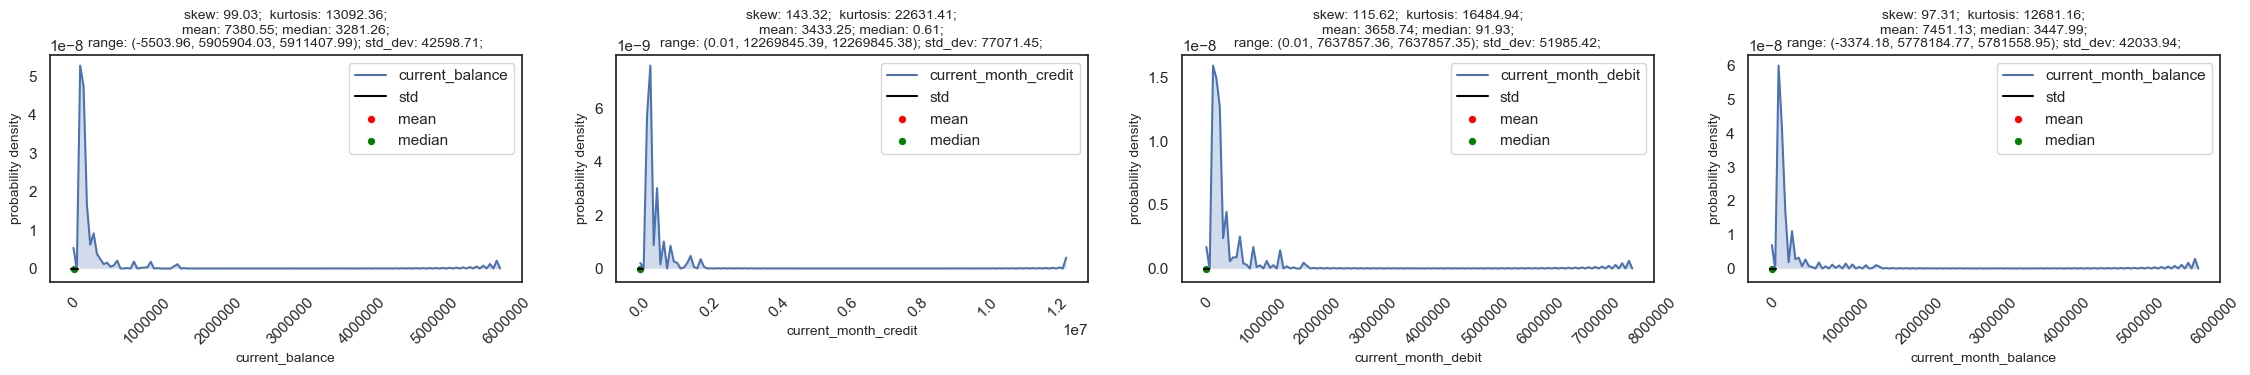

In [194]:
UVA_numeric(data,current_month)

**Analysis/Insights from current_month**
*    Considering the kurtosis and skewness value  for all 4 of these plots. Outliers/Extreme values are present.
*    Consider removing teh outliers in the dataset by using standard deviation and then visualizing teh graphs again

In [195]:
# standard deviation factor
factor = 3

# copying current_month
cm_data = data[current_month]

# filtering using standard deviation (not considering obseravtions > 3* standard deviation)
cm_data = cm_data[cm_data['current_balance'] < factor*cm_data['current_balance'].std()]
cm_data = cm_data[cm_data['current_month_credit'] < factor*cm_data['current_month_credit'].std()]
cm_data = cm_data[cm_data['current_month_debit'] < factor*cm_data['current_month_debit'].std()]
cm_data = cm_data[cm_data['current_month_balance'] < factor*cm_data['current_month_balance'].std()]

# checking how many points removed
len(data), len(cm_data)

(28382, 27113)

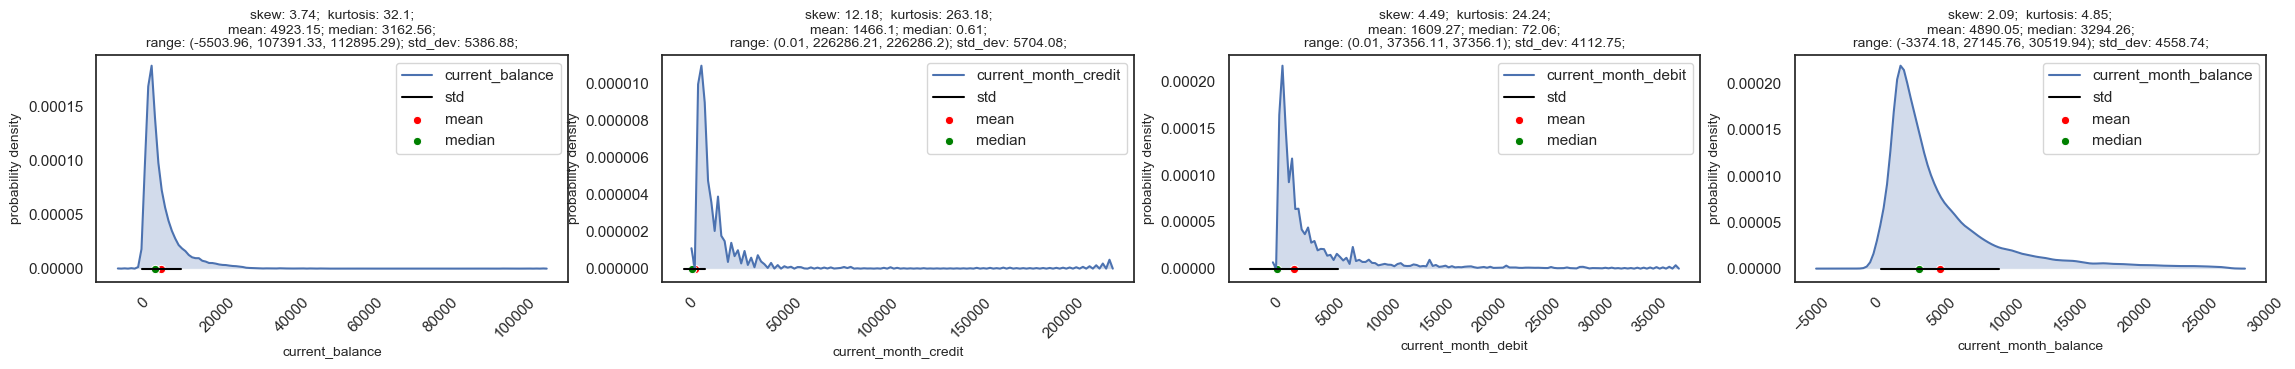

In [196]:
UVA_numeric(cm_data,current_month)

**Analysis/Insights from current_month (after removing data > 3 standard deviations towards right of the mean)**
*    After Removing extreme/outliers, plots are still very skewed.

**Things to investigate further down**
1.    Is there any common trait/relation between the customers who are performing high transaction credit/debits?**
2.    Customers who are performing high amount of transactions, are they doing it every month?**

### Previous Month Analysis

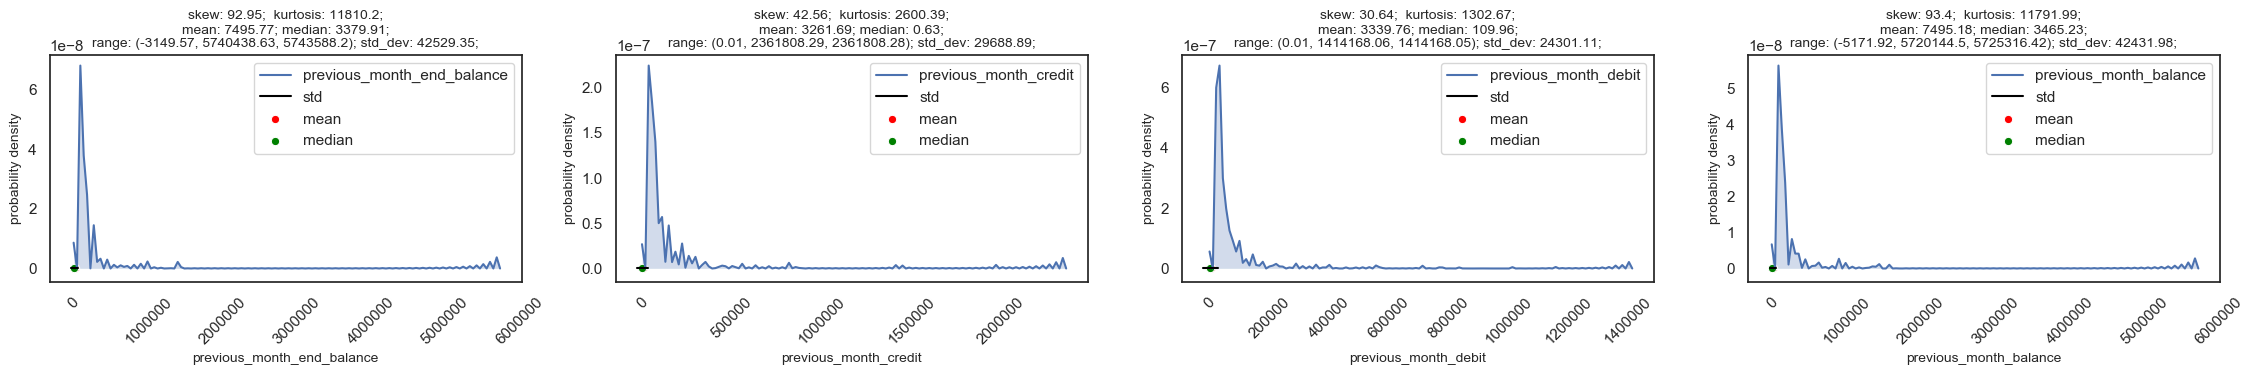

In [197]:
UVA_numeric(data,previous_month)

**Analysis/Insights from previous_month**
* This looks very similar to current_month. 
* Most of the customers transactions are very low value.

### Previous Quarters Analysis

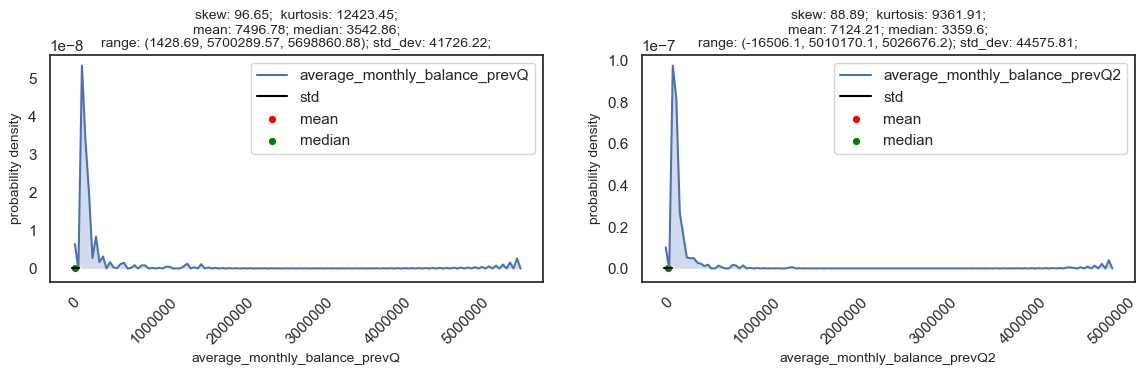

In [198]:
UVA_numeric(data,previous_quarters)

**Analysis/Insights from Previous Quarters**
* Similar trend seen in current month and previous month transaction. It is imperative that we find out the customer traits doing high value transactions.

### Transaction Date

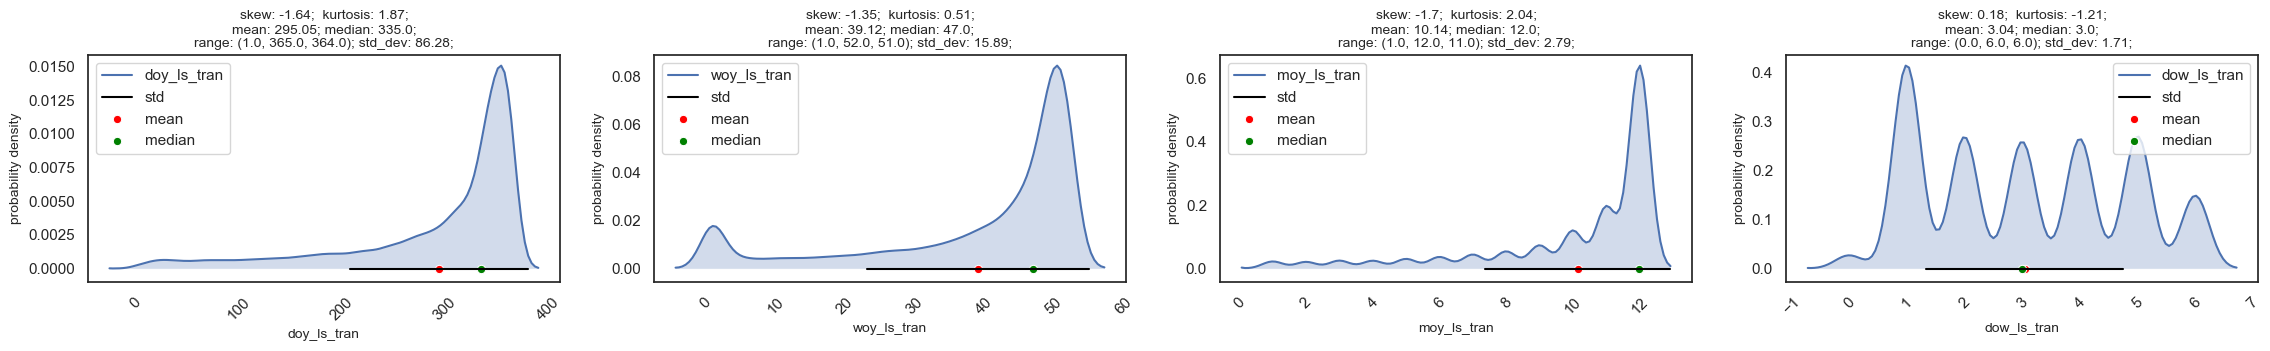

In [199]:
UVA_numeric(data,transaction_date)

**Analysis/Insights from Transaction Date**
*    **Day_of_Year**:
    *    most of the last transactions were made in the last 100 days of the extraction of data.
    *    There are transactions which were made more than an year ago.

*   **Week_of_year and Month_of_year**: these variable validate the findings from the **day_of_year**.

**Things to investigate further Down**
*    **Customers whose last transaction was 6 months ago, did all of them churn?**

In [200]:
#index resetting so indexes can be used as regular columns in dataframe
data[data['churn']==1][['customer_id','churn','gender']].groupby(['churn','gender']).count().reset_index()
#MultiIndex filtering
data[data['churn']==1][['customer_id','churn','gender']].groupby(['churn','gender']).count().loc[[(1,'Male')]]
#Index filtering using like
data[data['churn']==1][['customer_id','churn','gender']].groupby(['churn','gender']).count().filter(like='1' ,axis=0).filter(like='Female',axis=0)

,,customer_id
churn,gender,
1,Female,1985


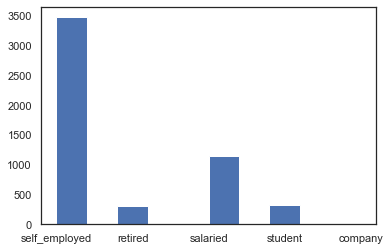

In [201]:
#histogram throws an exception for NaN values
plt.hist(pd.DataFrame(data[data['churn']==1]['occupation'])['occupation'].fillna('self_employed'))
plt.show()

Rectangle(xy=(1, 0), width=8.9, height=0.000961251, angle=0)
Rectangle(xy=(9.9, 0), width=8.9, height=0.00140983, angle=0)
Rectangle(xy=(18.8, 0), width=8.9, height=0.00839492, angle=0)
Rectangle(xy=(27.7, 0), width=8.9, height=0.0217884, angle=0)
Rectangle(xy=(36.6, 0), width=8.9, height=0.0240313, angle=0)
Rectangle(xy=(45.5, 0), width=8.9, height=0.0204853, angle=0)
Rectangle(xy=(54.4, 0), width=8.9, height=0.0154227, angle=0)
Rectangle(xy=(63.3, 0), width=8.9, height=0.00999701, angle=0)
Rectangle(xy=(72.2, 0), width=8.9, height=0.00504123, angle=0)
Rectangle(xy=(81.1, 0), width=8.9, height=0.00482762, angle=0)


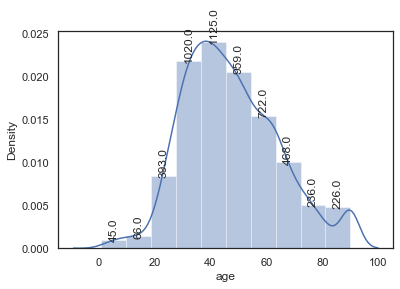

In [202]:
# distplot can be used to look at frequency as well as kdeplots
val=data[data['churn']==1]['churn'].value_counts()[1]
ax=sns.distplot(pd.DataFrame(data[data['churn']==1]['age'])['age'],bins=10)
for p in ax.patches:
    print(p)
    ax.text(p.get_x()+p.get_width()/2,p.get_height(),str(round(p.get_height()*val*p.get_width(),2)),ha='center',rotation=90)
    #ax.text(p.get_x()+p.get_width()/2,p.get_height(),str(round(p.get_height()*number_of_data_points/100,0)),ha='center')
plt.ylabel("Density")
plt.show()

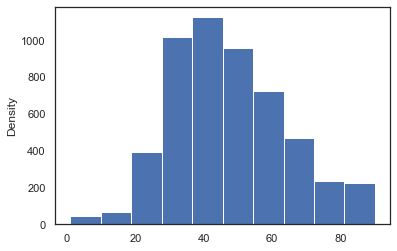

In [203]:
ax=plt.hist(pd.DataFrame(data[data['churn']==1]['age'])['age'],bins=10,normed=False)
plt.ylabel("Density")
plt.show()

### Univariate Analysis: Categorical Variables

In [204]:
data[data['churn']==1]['age'].value_counts(bins=10,normalize=False)

(36.6, 45.5]    1125
(27.7, 36.6]    1020
(45.5, 54.4]     959
(54.4, 63.3]     722
(63.3, 72.2]     468
(18.8, 27.7]     393
(72.2, 81.1]     236
(81.1, 90.0]     226
(9.9, 18.8]       66
(0.91, 9.9]       45
Name: age, dtype: int64

In [205]:
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

gender                  category
occupation              category
city                    category
customer_nw_category    category
branch_code             category
dtype: object

In [206]:
#segregate the categorical variables into groups to breakdown the analysis
customer_info=['gender','occupation','customer_nw_category','churn']
customer_accounts_info=['city','branch_code']
#churn doesn't need to be grouped

In [207]:
def UVA_Categorical(data,feature_set,annotation=True):
    
    ncols=len(feature_set)
    nrows=int(len(feature_set)/ncols)
    fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*len(feature_set),6),dpi=100)
    counter=0
    n=10
    for i in range(nrows):
        for j in range(ncols):
            ax=axes[j]
            feature_vc_pct=data[feature_set[counter]].value_counts()
            feature_nunique=data[feature_set[counter]].nunique()
            number_of_data_points=int(data.groupby(feature_set[counter]).count().sum()[0])
            if int(feature_nunique)>=n:
                #print('issu')
                g=sns.barplot(x=data[feature_set[counter]].value_counts(normalize=True).sort_values(ascending=False)[:n].index, y=data[feature_set[counter]].value_counts(normalize=True).sort_values(ascending=False)[:n],ax=ax)
            else:    
                g=sns.barplot(y=data[feature_set[counter]].value_counts(normalize=True)*100,x=data[feature_set[counter]].value_counts().index,ax=ax)
                if annotation==True:
                    for p in g.patches:
                        g.text(p.get_x()+p.get_width()/2,p.get_height(),str(round(p.get_height()*number_of_data_points/100,0)),ha='center')
            ax.set_title("unique categories: {}".format(feature_nunique))
            ax.set_xlabel(feature_set[counter],fontsize=15)
            ax.set_ylabel(feature_set[counter]+" distribution in percentage",fontsize=15)
            counter+=1
            

### Customer Info

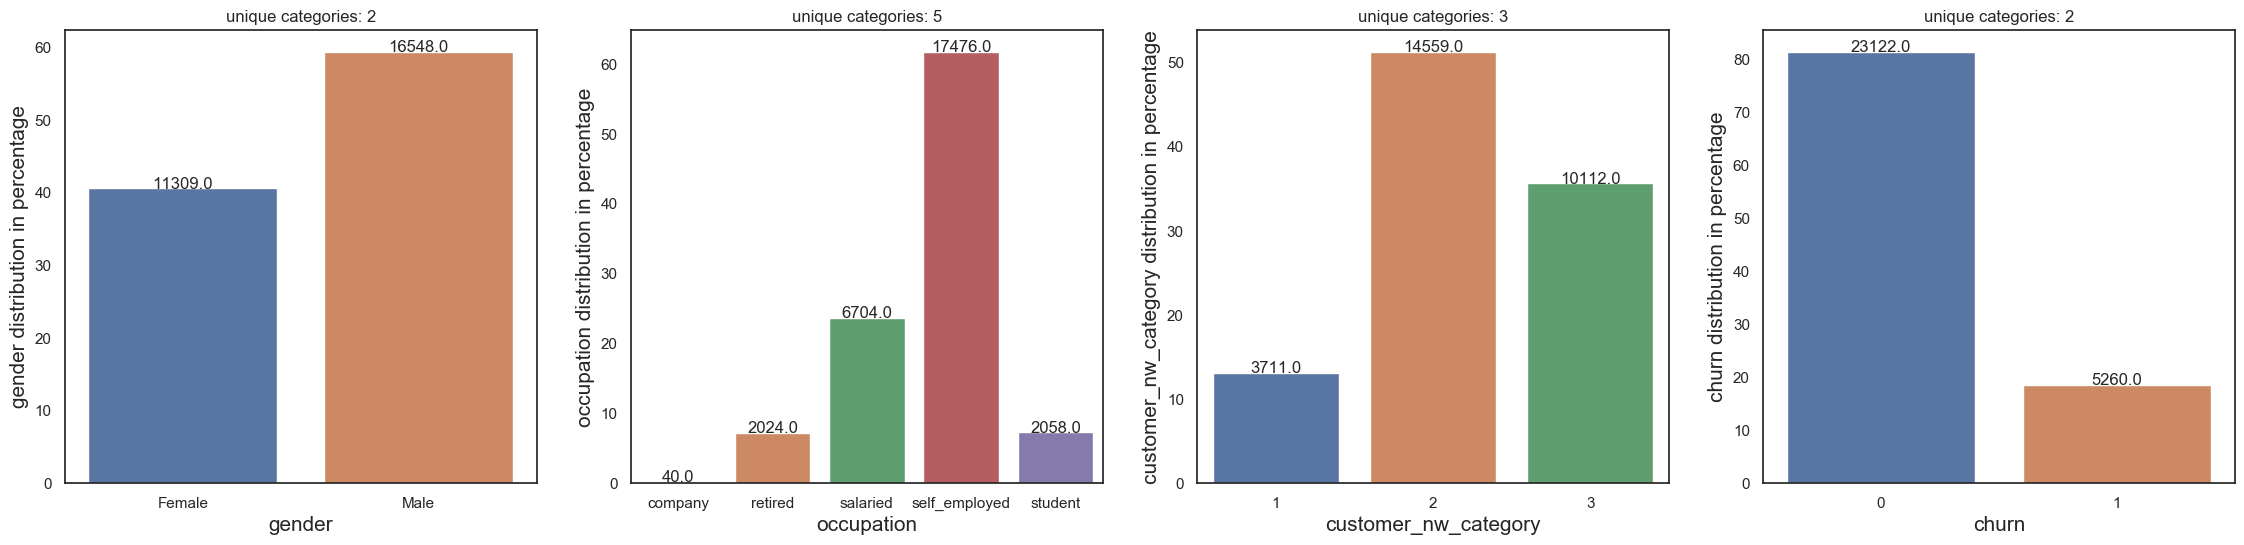

In [208]:
UVA_Categorical(data,customer_info)

**Analysis/Insight for Customer Info**
* Gender:
  *  Number of accounts held by male customers are more than the number of accounts held by female customers.

* Occupation
  * Majority of people are self_employed.
  * There are extremely few Company Accounts. Might explain Outlier/Extreme values in credit/debit.

* customer_nw_category:
  *  Half of all the accounts belong to the 2nd net worth category.
  *  Less than 15% belong to the highest net worth category.
  
* Churn: 
  * Number of people who churned are 1/4 times of the people who did not churn in the given data.

**Things to investigate:**
* Possibility: Company accounts are the reason behind the outlier transactions.
* Possibility: customers belonging to the highest net worth category may explain the skewness of the transactions.

### Customer Accounts Info

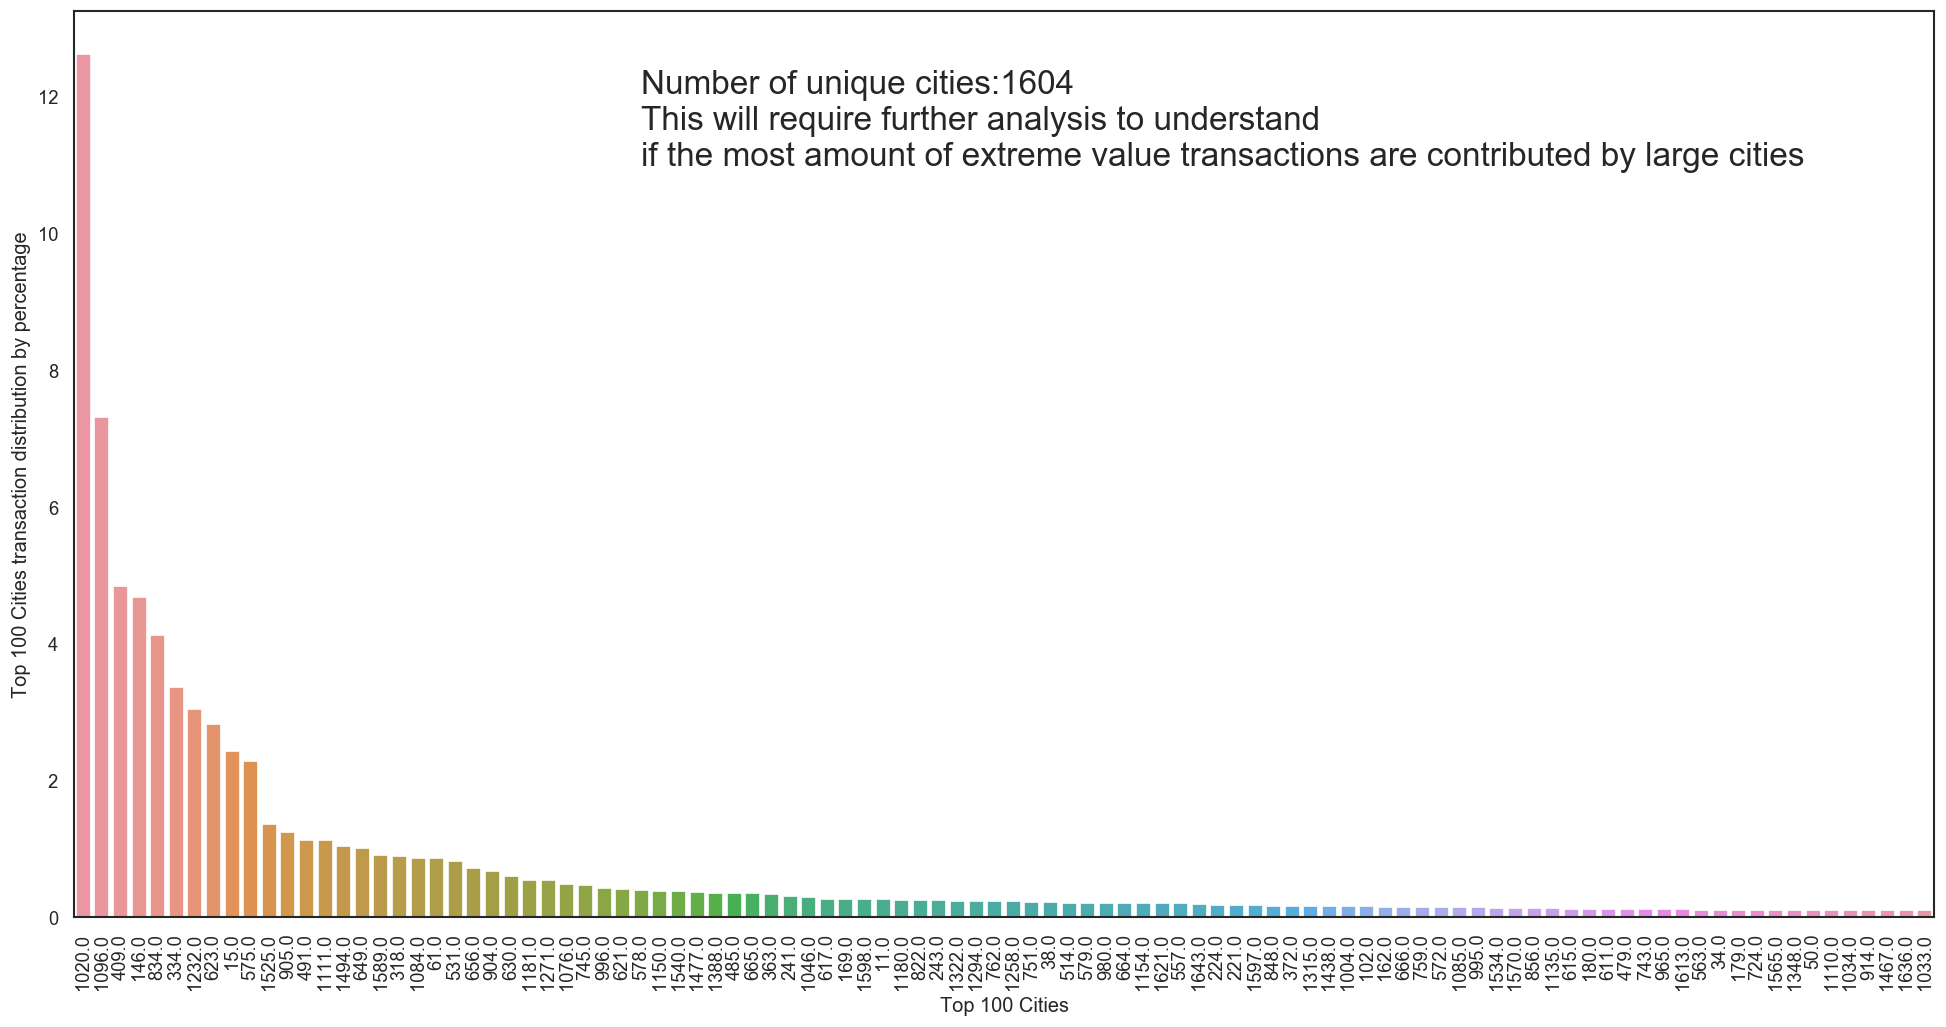

In [209]:
#Plotting "city"
plt.figure(figsize = (20,10), dpi = 120)
n=100
city_count = data['city'].value_counts(normalize=True)
ax=sns.barplot(city_count.sort_values(ascending=False)[:n].index, 100*city_count.sort_values(ascending=False)[:n] , order = city_count.sort_values(ascending=False)[:n].index)
ax.text(30,11,'Number of unique cities:'+ str(data['city'].nunique())+"\nThis will require further analysis to understand\nif the most amount of extreme value transactions are contributed by large cities",fontsize=20)
plt.xlabel('Top 100 Cities')
plt.xticks(rotation=90)
plt.ylabel('Top 100 Cities transaction distribution by percentage')
plt.show()

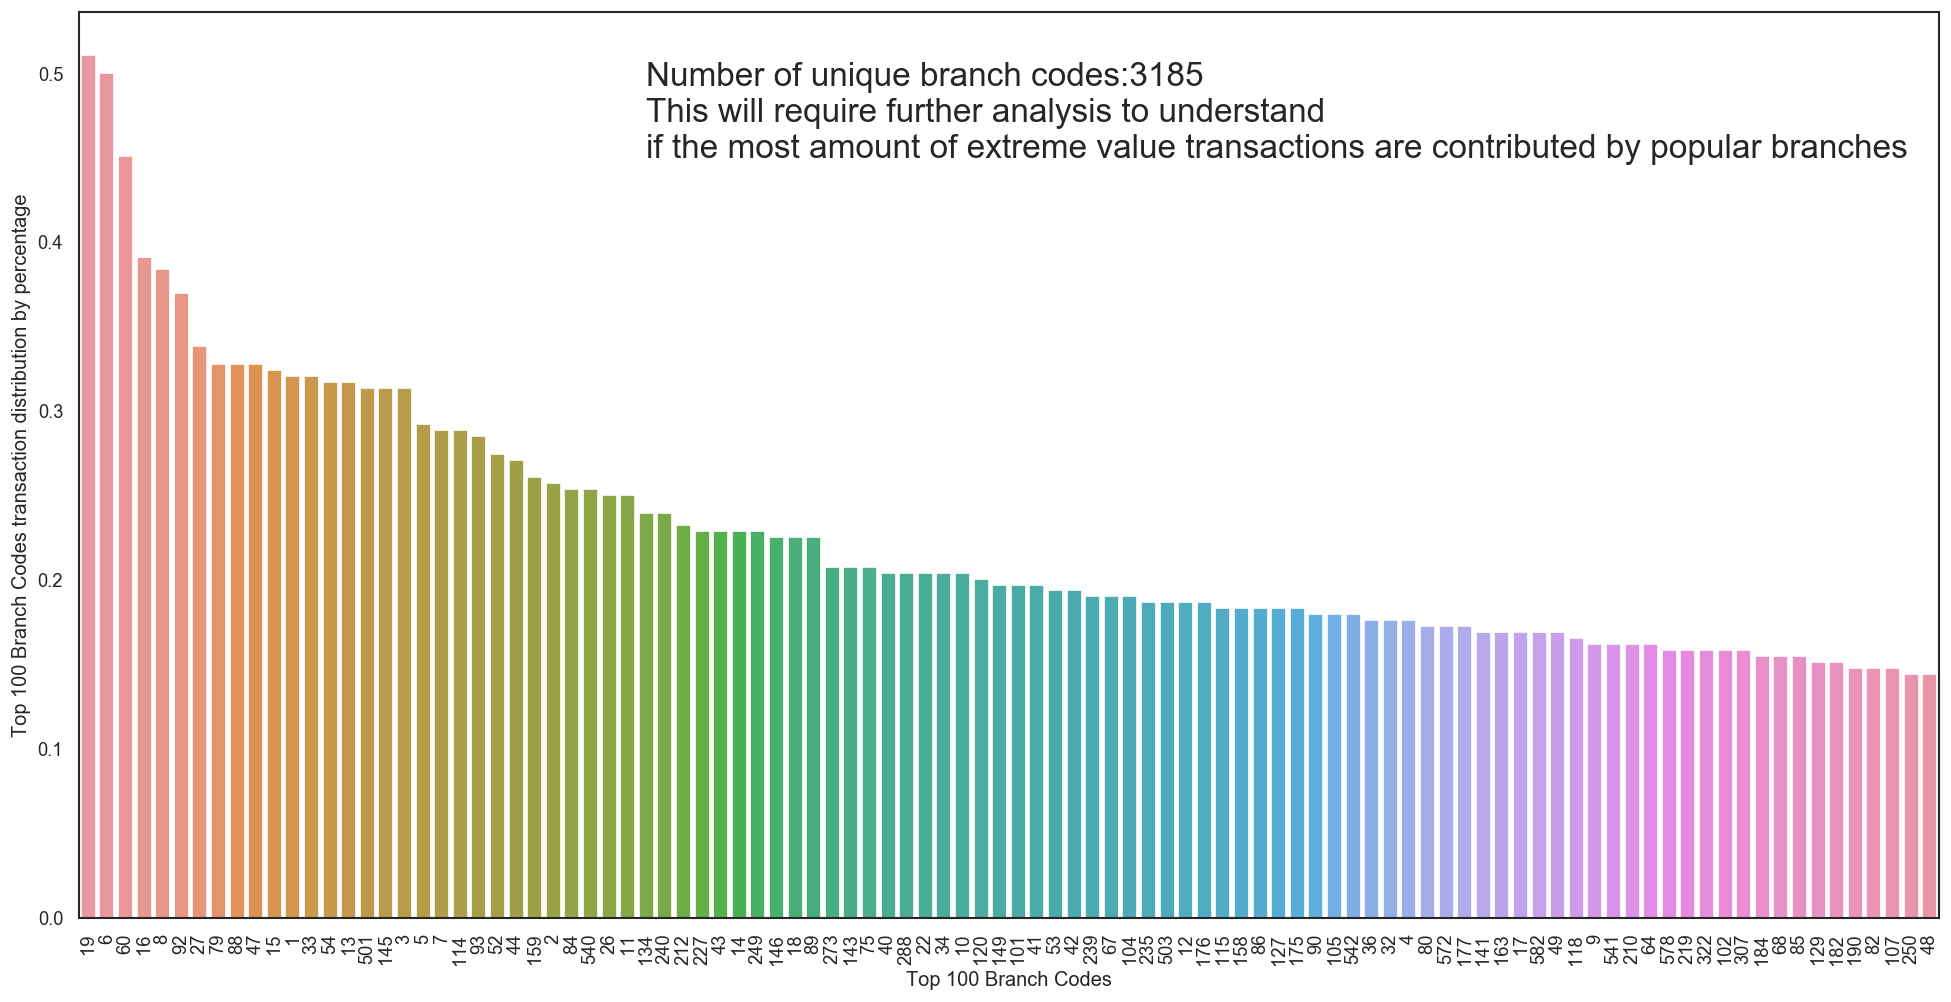

In [210]:
#Plotting "branch_codes"
plt.figure(figsize = (20,10), dpi = 120)
n=100
branch_code = data['branch_code'].value_counts(normalize=True)
ax=sns.barplot(branch_code.sort_values(ascending=False)[:n].index, 100*branch_code.sort_values(ascending=False)[:n] , order = branch_code.sort_values(ascending=False)[:n].index)
ax.text(30,0.45,'Number of unique branch codes:'+ str(data['branch_code'].nunique())+"\nThis will require further analysis to understand\nif the most amount of extreme value transactions are contributed by popular branches",fontsize=20)
plt.xlabel('Top '+str(n)+' Branch Codes')
plt.xticks(rotation=90)
plt.ylabel('Top '+str(n)+' Branch Codes transaction distribution by percentage')
plt.show()


**Analysis/Insights for Customer Accounts Info:**
for both variable "city" and "branch_code", there are too many categories.

**Things to investigate further Down**
* Popular cities and branch code might be able to explain the skewness and outliers of credit/debit variables.
* Possibility that cities and branch code with very few accounts may lead to churning.

### Univariate Analysis: Missing Values

In [211]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                           0
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
doy_ls_tran                       3223
woy_ls_tran                       3223
moy_ls_tran                       3223
dow_ls_tran                       3223
dtype: int64

**Things to investigate further down:**
*  gender: Do the customers with missing gender values have some common behaviour in-
  * churn: do missing values have any relation with churn?

* occupation:
 * Do missing values have similar behaviour to any other occupation?
 * Do they have any co-relation with churn?

* city:
 * the respective cities can be found using branch_code

* last_transaction:
 * checking their previous month and current month and previous_quarter activity might give insight on their last transaction.

* For almost all the above:

  * vintage: might be recording errors from same period of joining
  * branch_code: might be recording error from certain branch

## Univariate Analysis: Outliers

In [212]:
def UVA_outlier(data, feature_set, include_outlier = True):
    data1=data.copy()
    ncols=len(feature_set)
    nrows=int(len(feature_set)/ncols)
    counter=0
    fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(7*len(feature_set),6),dpi=100)
    for i in range(nrows):
        for j in range(ncols):
            ax=axes[j]
            q25=data1[feature_set[counter]].quantile(0.25)
            q50=data1[feature_set[counter]].quantile(0.5)
            q75=data1[feature_set[counter]].quantile(0.75)
            iqr=(q75-q25)
            whis_low=(q50-(1.5*iqr))
            whis_high=(q50+(1.5*iqr))
            outlier_hval=data1[data1[feature_set[counter]]>whis_high].shape[0]
            outlier_lval=data1[data1[feature_set[counter]]<whis_low].shape[0]
            outlier_count=outlier_hval+outlier_lval
            data1[feature_set[counter]]=data1[feature_set[counter]].apply(lambda x: whis_low-1 if x<whis_low else x)
            data1[feature_set[counter]]=data1[feature_set[counter]].apply(lambda x: whis_high+1 if x>whis_high else x)
            if include_outlier == True:
                sns.boxplot(data[feature_set[counter]],ax=ax)
            else:
                sns.boxplot(data1[feature_set[counter]],ax=ax)            
            ax.set_title("whiskers: {};\noutlier_counts(high/low/total): {};\n q25_q50_q75: {};\nIQR: {}".format((round(whis_low,2),round(whis_high,2)),(outlier_hval,outlier_lval,outlier_count),(round(q25,2),round(q50,2),round(q75,2)),round(iqr,0)))
            ax.tick_params(axis='x',labelrotation=90)
            counter+=1

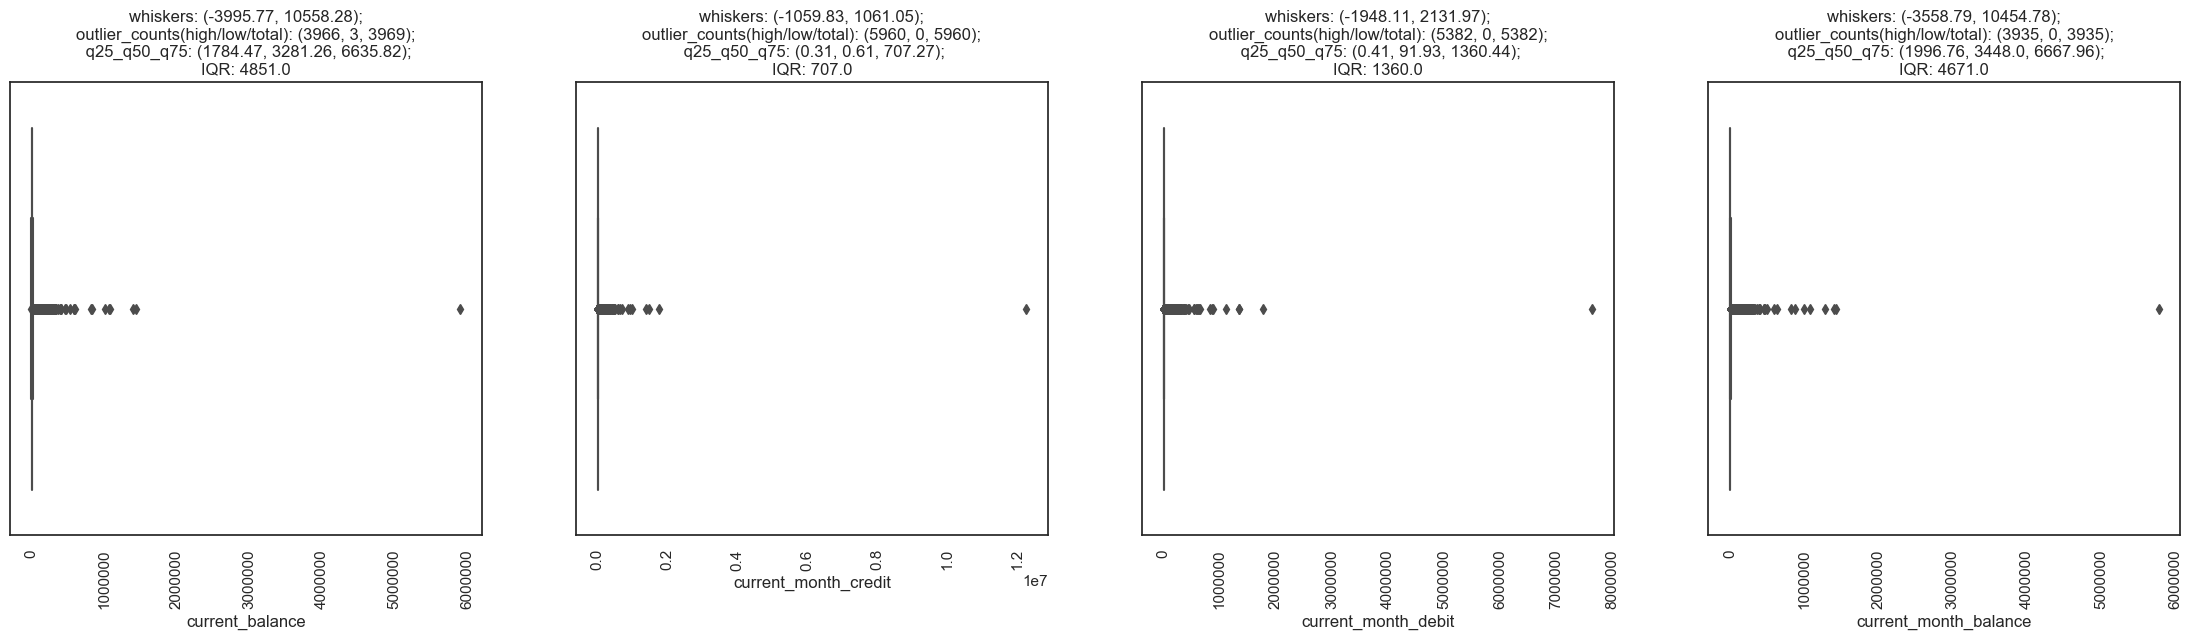

In [213]:
UVA_outlier(data,current_month,True)

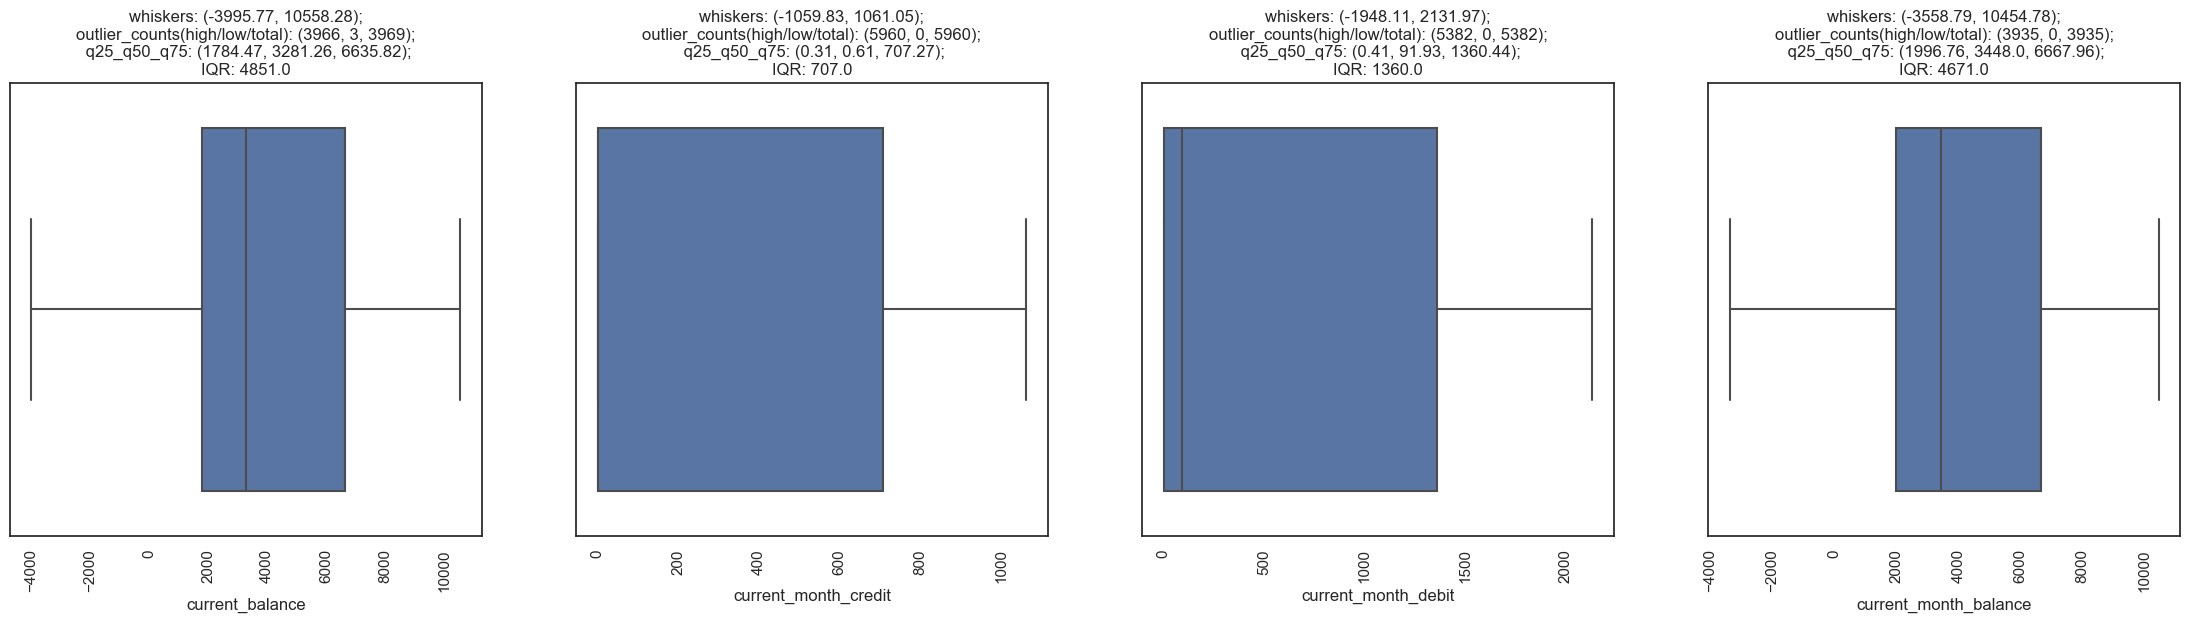

In [214]:
UVA_outlier(data,current_month,False)

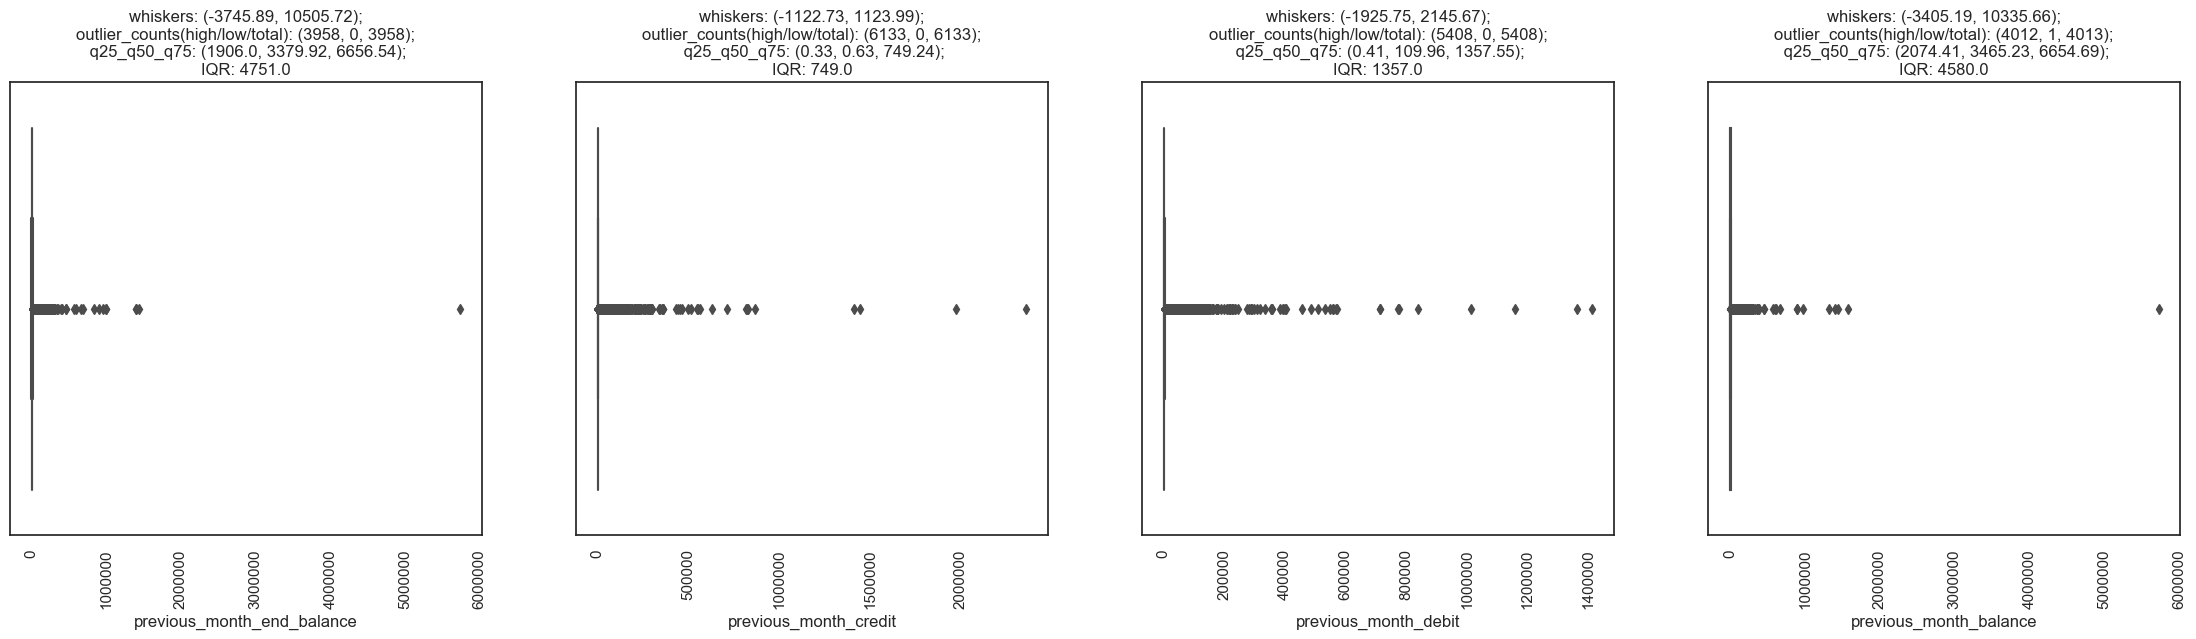

In [215]:
UVA_outlier(data, previous_month, include_outlier=True)

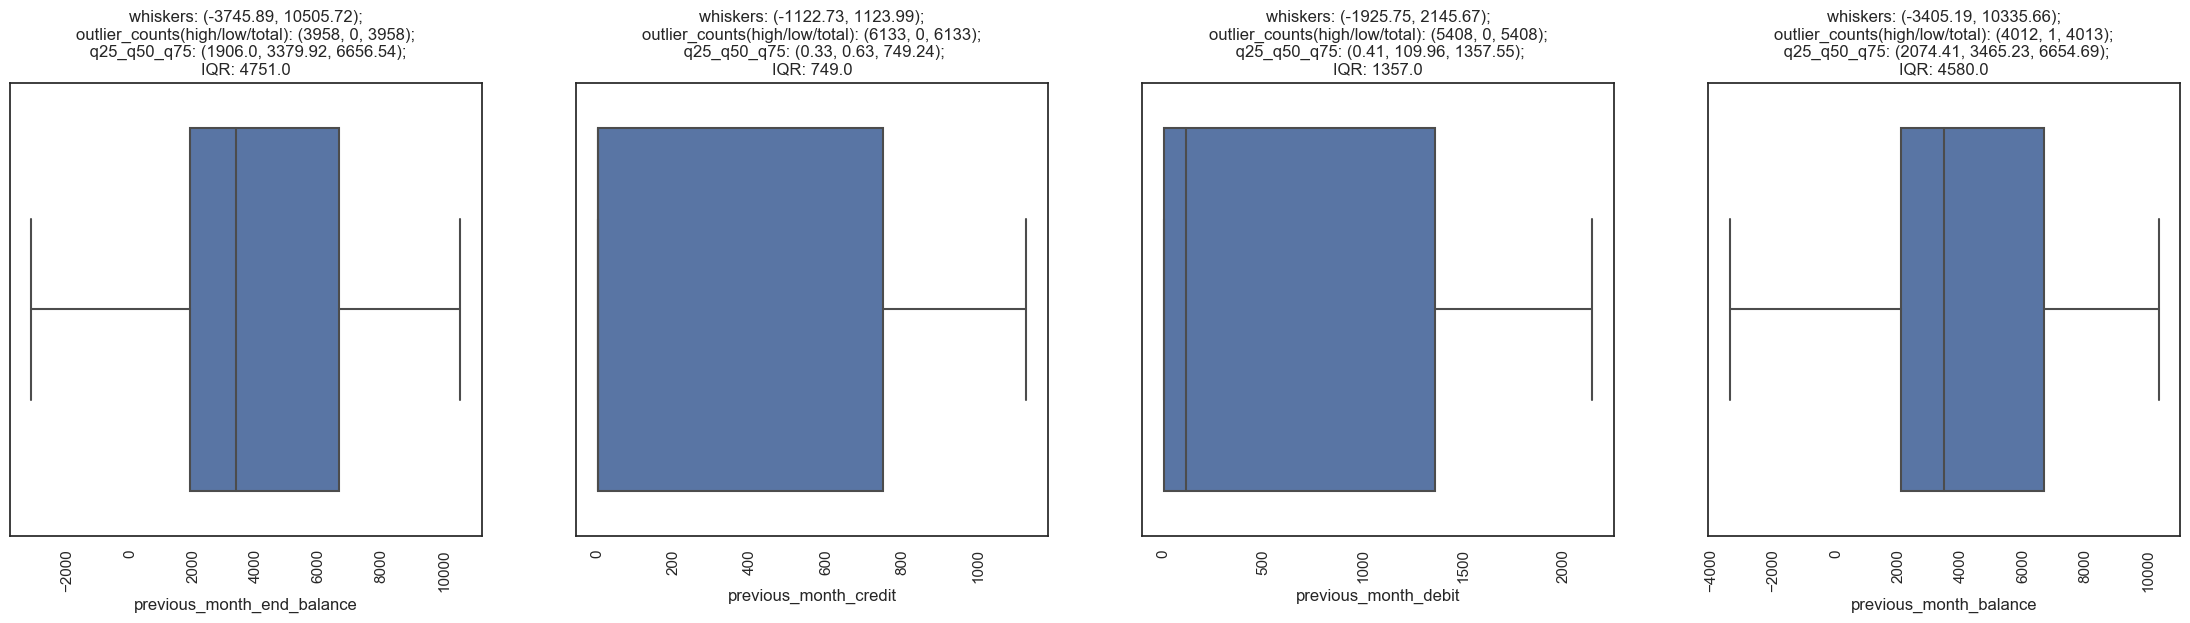

In [216]:
UVA_outlier(data, previous_month, include_outlier=False)

**Analysis/Insights from Box and Whisker plots for current_month and previous_month:**
* If we look at corresponding plots in the outputs above, there seems to be a strong relation between the corresponding plots of previous_month and current_month variables.

* Outliers are significant in number and very similar in number between corresponding plots. Which indicates some inherent undiscovered behviour of Outliers.

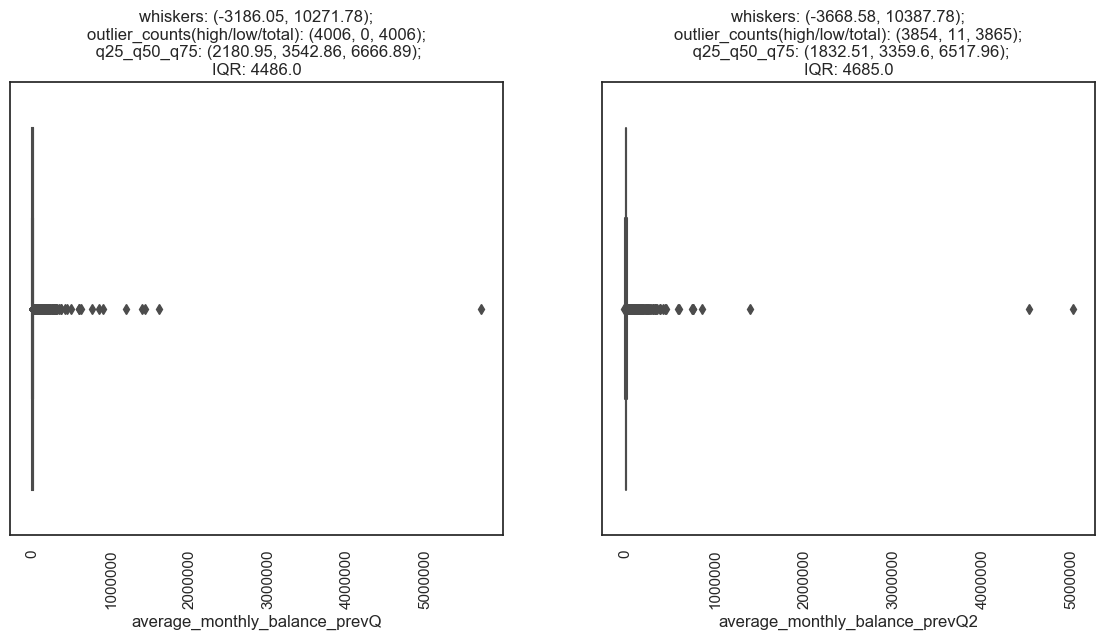

In [217]:
UVA_outlier(data,previous_quarters)

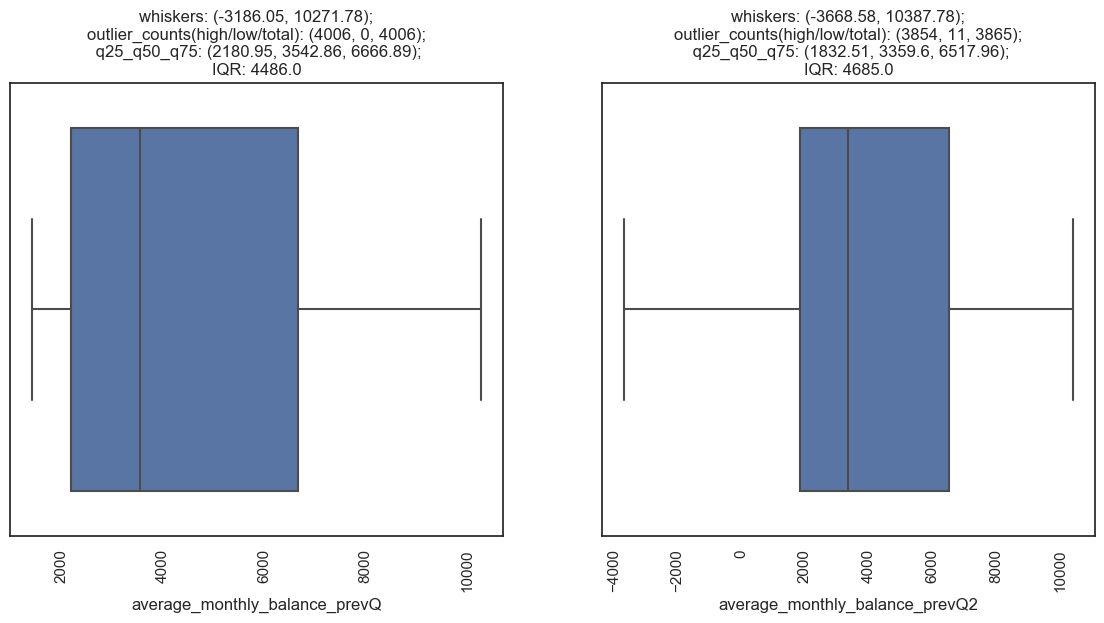

In [218]:
UVA_outlier(data,previous_quarters,False)

**Analysis/Insights from Box and Whisker plots for from Quarterly Balances:**
* Outliers in previous two quarters are very similar but significantly large in number.

## Investigation directions from Univariate Analysis

1.  Is there an inherent relationship between the traits of the customers who are performing high transaction credit/debits? We can find that correlation from:
   * Customer_nw_category
   * Occupation
   * Popular cities
2. If the customers haven't performed a transaction in a long time (more than 6 months), has that customer churned? (this will help us predicting the behavior)
3. Possibility that cities and branch code with very few accounts may lead to churning.


## Central Limit Theorem:
* Explains that if you pick up a sample distribution from a population distributed in any way, the sample means for all the samples can be plotted in a Normal distribution. The sample distribution internally can be akin to whatever distribution the population has

2091.1441054189277

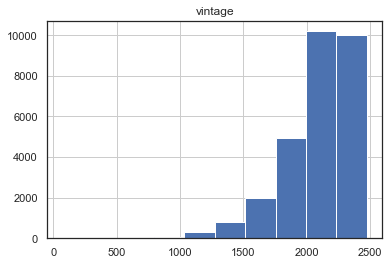

In [219]:
population = data['vintage']
population = pd.DataFrame(population)
population.hist(bins=10)
population['vintage'].mean()

In [220]:
# Create a list
sampled_means = []

# For 1000  times,
for i in range(0,1000):
    # Take a random sample of 100 rows from the population, take the mean of those rows, append to sampled_means
    sampled_means.append(population.sample(n=100).mean())

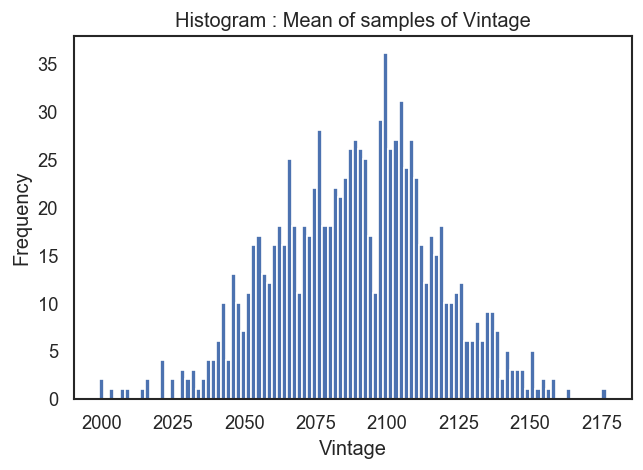

In [221]:
# plotting histogram
plt.figure(dpi = 120)
plt.hist(np.asarray(sampled_means).reshape(np.asarray(sampled_means).shape[0],),bins=100)
plt.xlabel("Vintage")
plt.ylabel('Frequency')
plt.title("Histogram : Mean of samples of Vintage")
plt.show()

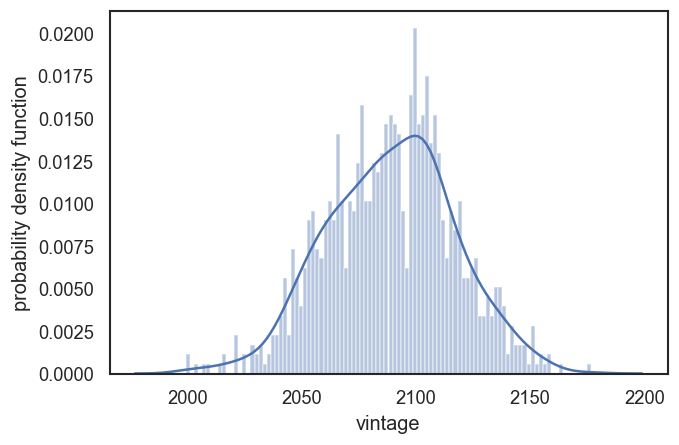

In [222]:
plt.figure(dpi = 120)
sns.distplot(np.asarray(sampled_means).reshape(np.asarray(sampled_means).shape[0],),bins=100)
plt.xlabel('vintage')
plt.ylabel('probability density function')
plt.show()

<class 'numpy.ndarray'>
(1000,)


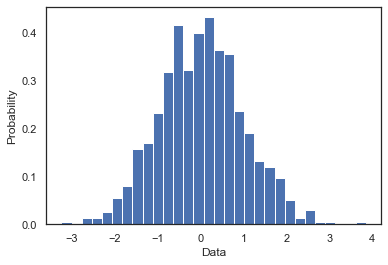

In [223]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(42)
x = np.random.normal(size=1000)
print(type(x))
print(x.shape)
plt.hist(x, density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

In [224]:
mean_error=population.mean()-np.asarray(sampled_means).reshape(np.asarray(sampled_means).shape[0],).mean()
print(mean_error)

vintage    2.063255
dtype: float64


## Bivariate Analysis: Numerical - Numerical

In [225]:
data[numerical_columns].dropna().shape[0]/data[numerical_columns].shape[0]
print("The percentage of data that has null values in the dataframe is:"+"{:.2%}".format(1-(data[numerical_columns].dropna().shape[0]/data[numerical_columns].shape[0])))

The percentage of data that has null values in the dataframe is:11.36%


In [226]:
data_non_null=data[numerical_columns].dropna().copy()

### Correlation Table

In [227]:
#by default the correlation matrix calculation that is used is based on Pearson's Correlation which is based on COV(X,Y)
corr=data_non_null.corr()
corr

,customer_id,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
customer_id,1.000000,-0.009651,0.001541,-0.012398,0.005988,0.005147,0.003671,-0.003868,0.002633,-0.006859,0.002705,-0.009123,0.004424,0.003691,-0.001184,-0.010550,0.007208,-0.009882,0.008990
vintage,-0.009651,1.000000,0.005880,0.003606,-0.001731,-0.002073,-0.003786,-0.003531,-0.004911,-0.000180,-0.005053,-0.007170,-0.002360,-0.003627,-0.003453,-0.004435,-0.012589,-0.005372,-0.008596
age,0.001541,0.005880,1.000000,0.002609,0.051896,0.056351,0.059950,0.057780,0.025688,0.031957,0.029813,0.035549,0.055441,0.058597,-0.019916,0.016642,0.003852,0.017257,-0.017958
dependents,-0.012398,0.003606,0.002609,1.000000,-0.010453,-0.009058,-0.009200,-0.010895,0.003200,0.025559,0.007075,0.027579,-0.009994,-0.008883,0.017691,0.105039,0.048006,0.102641,-0.004080
current_balance,0.005988,-0.001731,0.051896,-0.010453,1.000000,0.945291,0.956524,0.702469,0.030892,0.062775,0.045188,0.082299,0.982686,0.940032,-0.024580,0.019978,-0.000374,0.019094,0.003441
previous_month_end_balance,0.005147,-0.002073,0.056351,-0.009058,0.945291,1.000000,0.969295,0.711315,0.033085,0.116568,0.066988,0.111357,0.973843,0.968213,0.006932,0.014381,0.003973,0.014125,0.004301
average_monthly_balance_prevQ,0.003671,-0.003786,0.059950,-0.009200,0.956524,0.969295,1.000000,0.753168,0.034278,0.087398,0.061488,0.123279,0.975238,0.993908,0.012412,0.012688,0.002552,0.012721,0.003469
average_monthly_balance_prevQ2,-0.003868,-0.003531,0.057780,-0.010895,0.702469,0.711315,0.753168,1.000000,0.036945,0.063387,0.045961,0.103883,0.713989,0.725502,0.019203,0.006363,-0.012678,0.005499,-0.002391
current_month_credit,0.002633,-0.004911,0.025688,0.003200,0.030892,0.033085,0.034278,0.036945,1.000000,0.168086,0.937300,0.135231,0.034810,0.038995,0.020121,0.033129,0.010479,0.031521,0.000947
previous_month_credit,-0.006859,-0.000180,0.031957,0.025559,0.062775,0.116568,0.087398,0.063387,0.168086,1.000000,0.164427,0.733811,0.086949,0.110735,0.040305,0.071645,0.019146,0.068229,-0.007766


## Unstacked Correlation Table
* display only those values that are highly correlated
* we are intesrested in only those variables for which absolute value of correlation is atleast .5

In [228]:
corr_unstack=corr.abs().unstack().sort_values(kind="quicksort",ascending=True).reset_index()
corr_unstack['corr_val']=corr_unstack[0]
corr_unstack=corr_unstack.drop(columns=0)
corr_unstack2=corr_unstack[corr_unstack['level_0']!=corr_unstack['level_1']].copy()
corr_unstack2[corr_unstack2['corr_val']>0.0].sort_values(by='corr_val',ascending=False)

,level_0,level_1,corr_val
341,doy_ls_tran,moy_ls_tran,0.994550
340,moy_ls_tran,doy_ls_tran,0.994550
339,average_monthly_balance_prevQ,previous_month_balance,0.993908
338,previous_month_balance,average_monthly_balance_prevQ,0.993908
337,current_balance,current_month_balance,0.982686
...,...,...,...
5,current_month_debit,dow_ls_tran,0.000747
2,current_balance,woy_ls_tran,0.000374
3,woy_ls_tran,current_balance,0.000374
1,previous_month_credit,vintage,0.000180


## Heatmap
* Heatmaps are used to plot the correlation among the columns to identify fairly quickly the features that have a high degree of correlation amongst them.

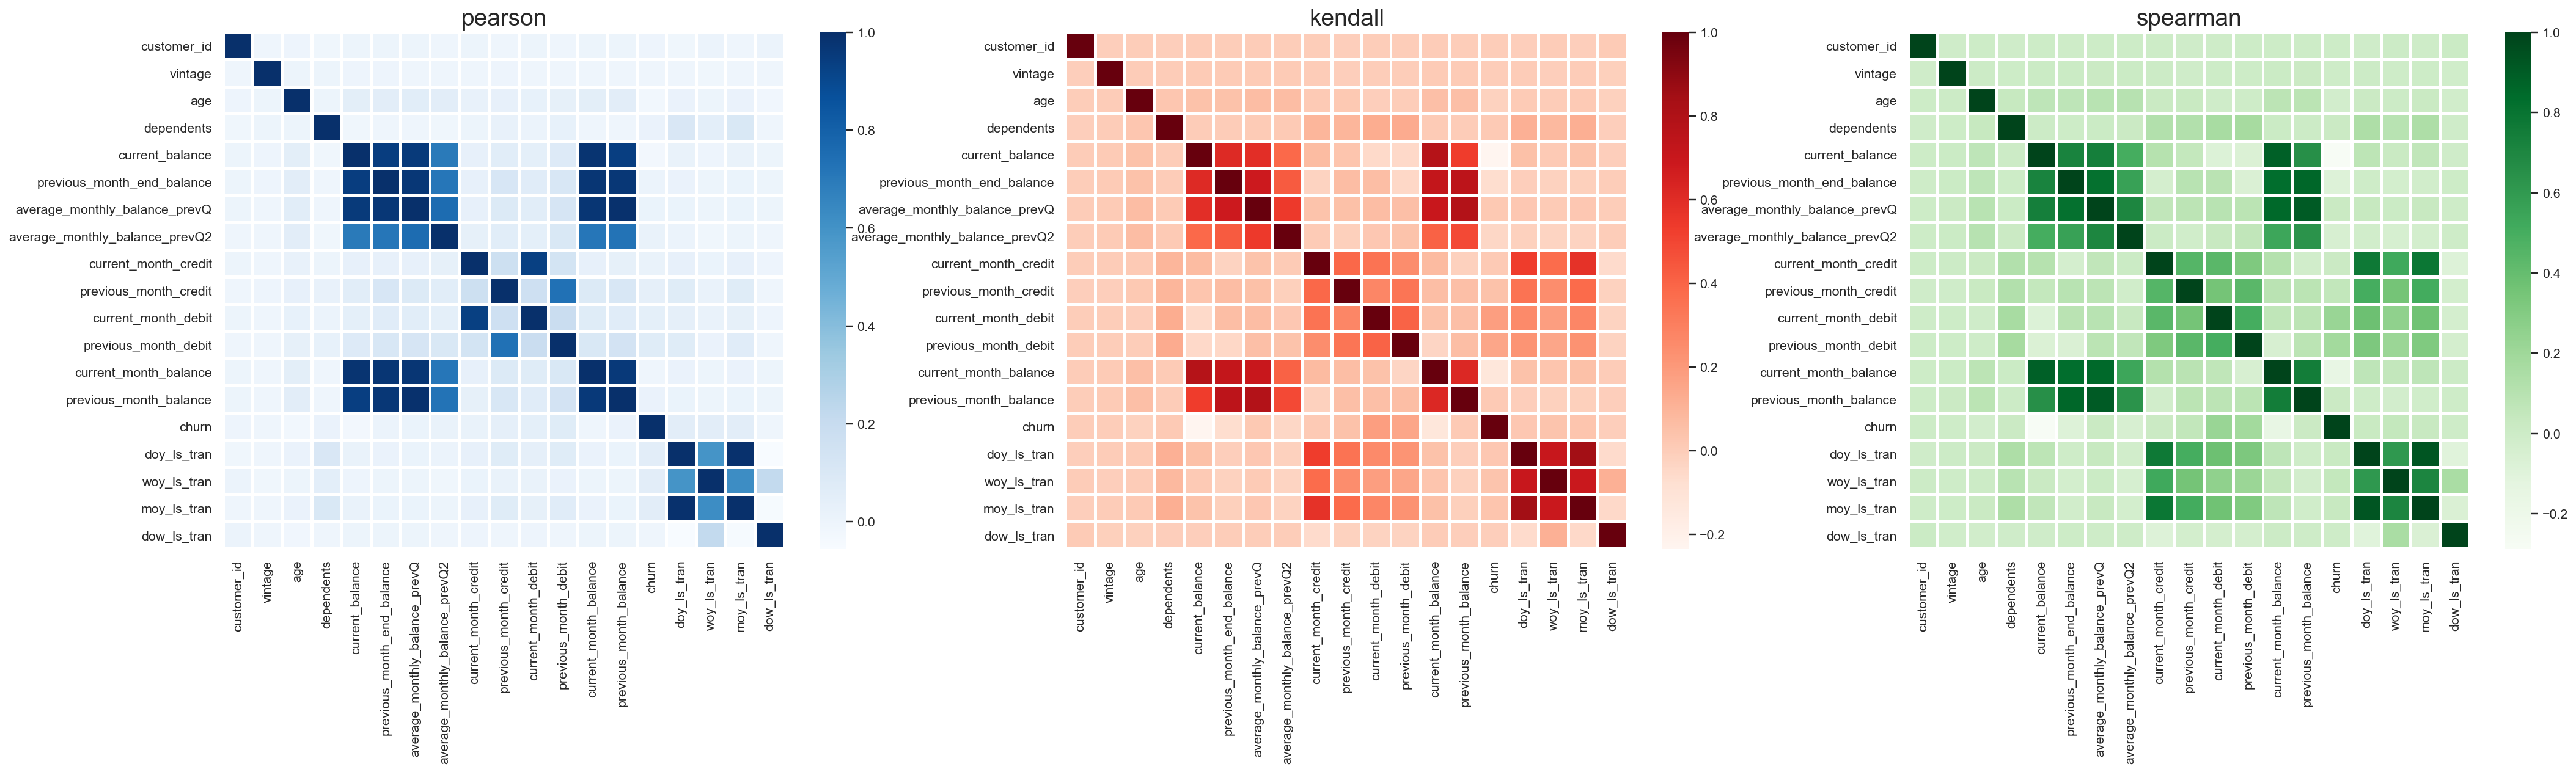

In [229]:
corr_models=['pearson','kendall','spearman']
#for i in enumerate(corr_models):
#    print (i)
cmap_j=["Blues","Reds","Greens"]
ncols=len(corr_models)
nrows=int(len(corr_models)/ncols)
fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(36,8),dpi=140)
counter=0
for i in range(nrows):
    for j in range(ncols):
        ax=axes[j]

        correlation = data_non_null.corr(method=corr_models[counter])
        sns.heatmap(correlation, linewidth=2,annot=False,cmap=cmap_j[j],ax=ax)
        ax.set_title(corr_models[counter],fontsize=20)
        counter=counter+1
        

* Kendall and Spearman correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation.
*  Too many variables with insignificant correlation.
*  Major correlation lies between the transaction variables and balance variables.

## Zooming into the Continuous features with high correlation (Amount columns)

In [230]:
#current_month previous_month previous_quarters
list_amount_features=[]
list_amount_features.extend(current_month)
list_amount_features.extend(previous_month)
list_amount_features.extend(previous_quarters)




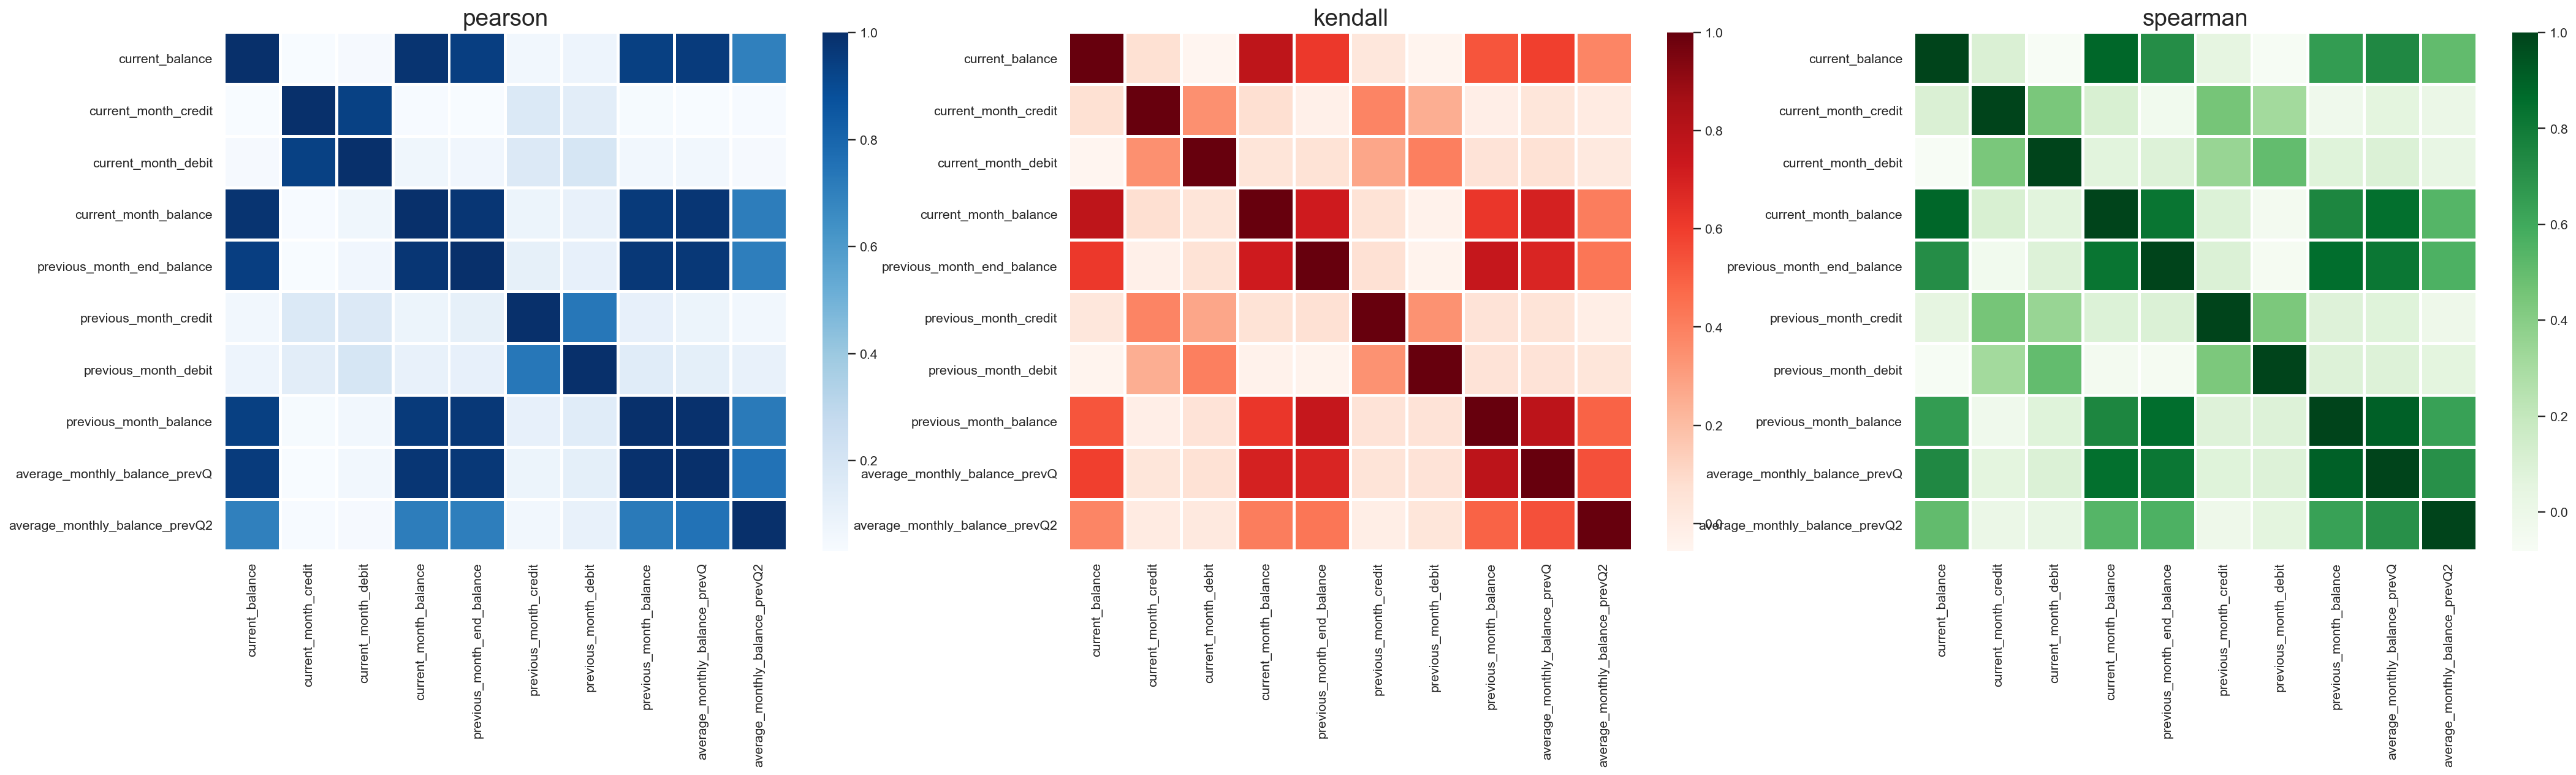

In [231]:
corr_models=['pearson','kendall','spearman']
#for i in enumerate(corr_models):
#    print (i)
cmap_j=["Blues","Reds","Greens"]
ncols=len(corr_models)
nrows=int(len(corr_models)/ncols)
fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(36,8),dpi=140)
counter=0
for i in range(nrows):
    for j in range(ncols):
        ax=axes[j]
        correlation = data_non_null[list_amount_features].corr(method=corr_models[counter])
        sns.heatmap(correlation, linewidth=2,annot=False,cmap=cmap_j[j],ax=ax)
        ax.set_title(corr_models[counter],fontsize=20)
        counter=counter+1

**Analysis/Insights:**


1.   Transaction variables such as credit/debit have a strong correlation among themselves.
2.  Balance variables have strong correlation among themselves.
3.   Transaction variables like credit/debit have insignificant or no correlation with the Balance variables.



## Group Credit and Debit Transaction Variables and analyze the correlation

In [232]:
transactions = ['current_month_credit','current_month_debit','previous_month_credit','previous_month_debit']

<Figure size 840x560 with 0 Axes>

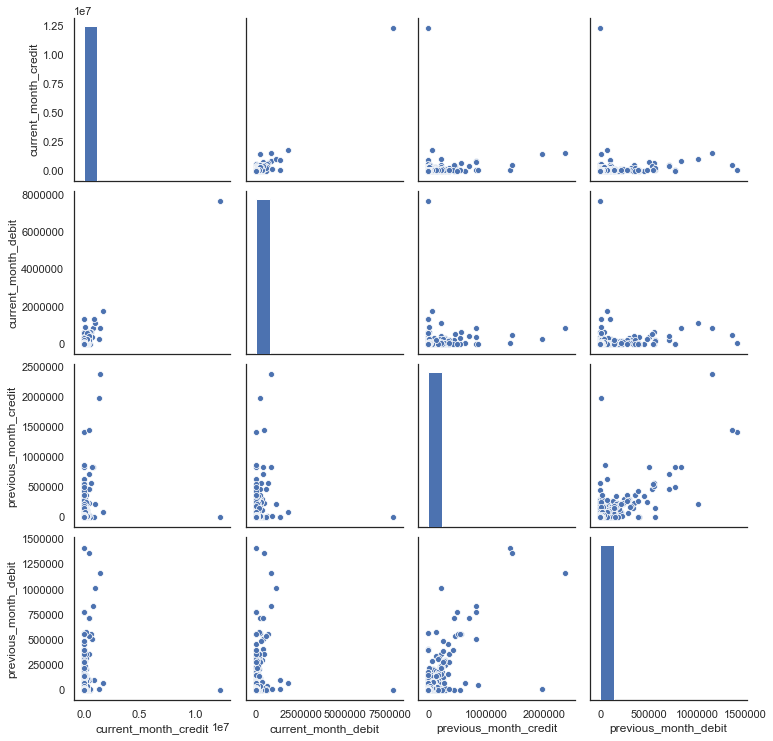

In [233]:
plt.figure(dpi=140)
sns.pairplot(data[transactions])
plt.show()

In [234]:
# the plots above are not meaningful because of the outlier values
# A lot of data is clustered around lower magnitude values. So taking a log of the values will help us visualize the plot better. We can also use SatndardScaler from Scikit to stadardize the values around standard deviation.
# We will use StandardScaler during feature Engineering
# Since, the logs of negative numbers and zeros are undefined, we will shift the scale of these scalar numbers. this will not affect the correlation. It will just help us plot the logs properly and visualize the correlation
data_including_nulls=data[numerical_columns].copy()
for column in list_amount_features:
    min_add=1 
    if data[column].min()<0:
        min_add =  abs(data_including_nulls[column].min()) + 1
    data_including_nulls[column]=data_including_nulls[column].map(lambda x:x+min_add)
    data_including_nulls[column]=data_including_nulls[column].map(lambda x:np.log(x))

<Figure size 840x560 with 0 Axes>

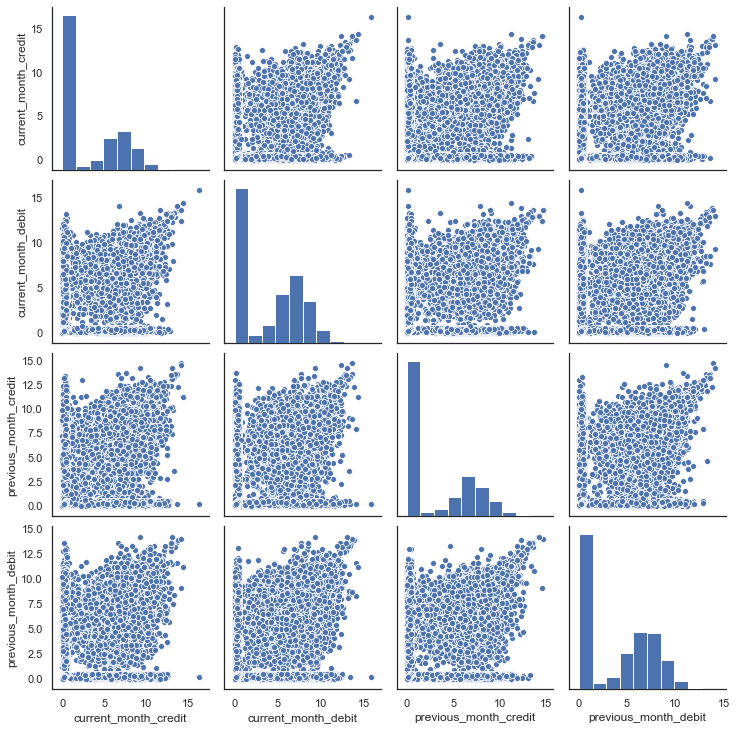

In [235]:
plt.figure(dpi=140)
sns.pairplot(data_including_nulls[transactions])
plt.show()

**Analysis/Insights gathered from Transaction Data**
1.    This validates the high correlation between the transaction variables.
2.    This high correlation can be used for feature engineering during the later stages.

## Group Balance Variables and analyze the correlation

In [236]:
balance = ['previous_month_end_balance','previous_month_balance','current_balance','current_month_balance']

<Figure size 840x560 with 0 Axes>

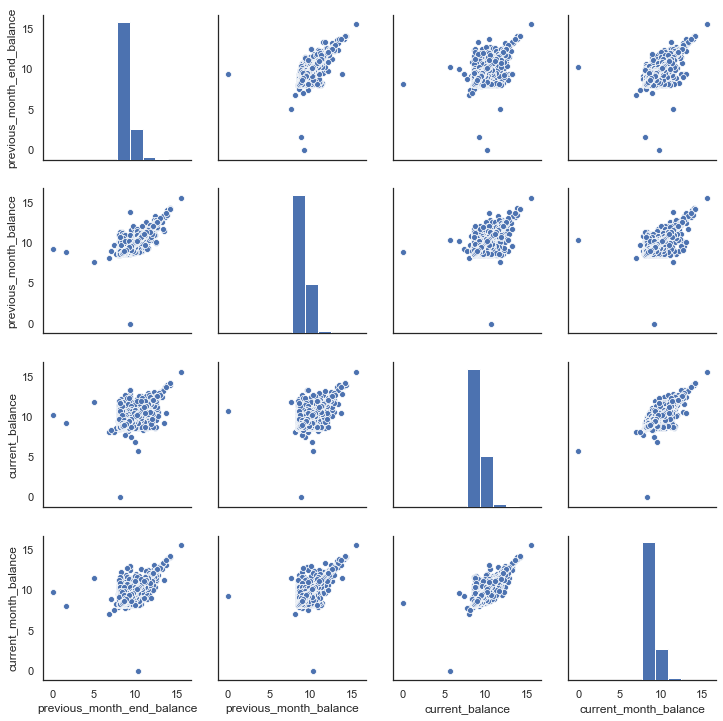

In [237]:
plt.figure(dpi=140)
sns.pairplot(data_including_nulls[balance])
plt.show()

**Analysis/Insights**
1.    This validates the high correlation between the balance variables.
2.    This high correlation can be used for feature engineering during the later stages.

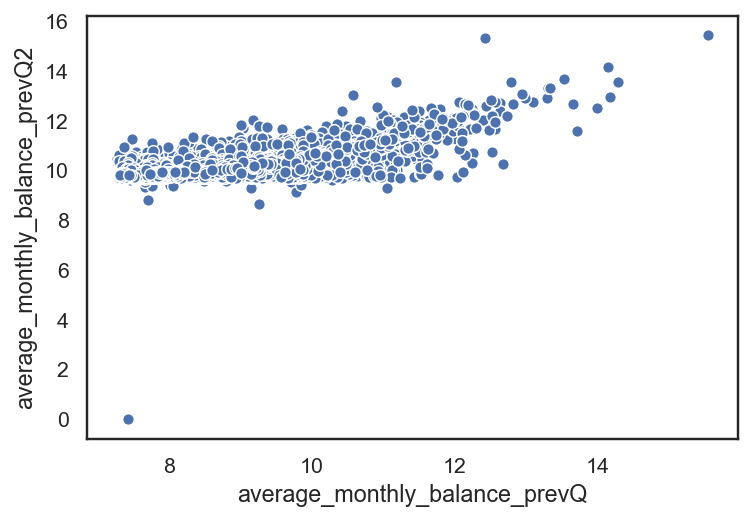

In [238]:
# previous quarters
plt.figure(dpi=140)
sns.scatterplot(data_including_nulls['average_monthly_balance_prevQ'], data_including_nulls['average_monthly_balance_prevQ2'])

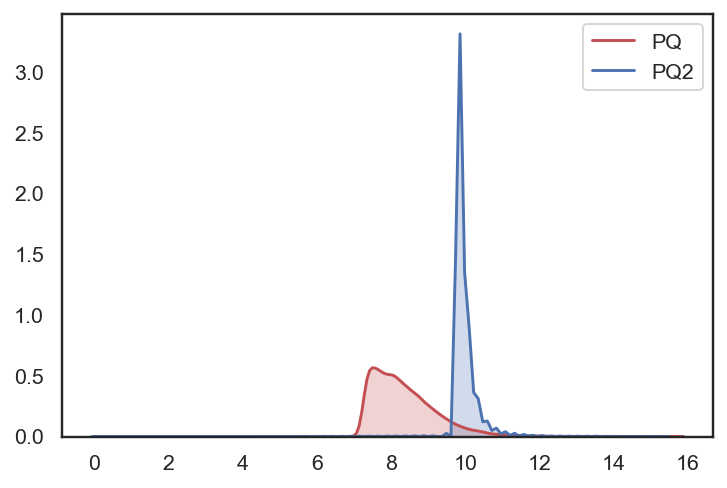

In [239]:
# previous quarters
plt.figure(dpi=140)
p1=sns.kdeplot(data_including_nulls['average_monthly_balance_prevQ'], shade=True, color="r",label='PQ')
p2=sns.kdeplot(data_including_nulls['average_monthly_balance_prevQ2'], shade=True, color="b",label='PQ2')

## Bivariate Analysis: Continuous-Categorical variables

List of Hypothesis and investigation to perform under this combination.

1.  Are vintage customers less likely to churn?
2.  Are customers with higher average balance less likely to churn?
3.  Are customers dropping monthly balance highly likely to churn?

$$ 2-samp-z-Test = \frac{\bar{X}_1-\bar{X}_2}{\sqrt{\frac{\hat{\sigma}_1^2}{n1} + \frac{\hat{\sigma}_2^2}{n2}}} \\ $$

In [240]:
#from numpy import sqrt, abs, round
from scipy.stats import norm
from scipy.stats import t as t_dist
def BV_compare_features(data,compare,category,category_val):
    temp_data=data.copy()
    x1=temp_data[compare][temp_data[category]==category_val]
    x0=temp_data[compare][~(temp_data[category]==category_val)]
    m1=x1.mean()
    m0=x0.mean()
    med1=x1.median()
    med0=x0.median()
    medians=[med1,med0]
    #print(m1,m0)
    n1=x1.shape[0]
    n0=x0.shape[0]
    std1, std0 = x1.std(), x0.std()
    ovr_sigma=np.sqrt(std1**2/n1 + std0**2/n0)
    df = n1+n0-2
    
    Z_val,T_val=(m1-m0)/ovr_sigma,(m1-m0)/ovr_sigma
    Z_pval = 2*(1 - norm.cdf(abs(Z_val)))  #Z_pval: this value compared to 0.05 helps us assess our hypothesis. If this value is greater than 0.05, then our original hypothesis is true. Otherwise our alternate hypothesis is true
    T_pval = 2*(1 - t_dist.cdf(abs(T_val),df)) #T_pval
    
    
    plt.figure(figsize = (15,6))
    
    table = pd.pivot_table(data=temp_data, values=compare, columns=category, aggfunc = np.mean)
  
      #barplot
    plt.subplot(1,2,1)
    sns.barplot(['not {}'.format(category),str(category)], [m0, m1])
    plt.ylabel('mean {}'.format(compare))
    plt.xlabel(category)
    plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(T_pval,
                                                                Z_pval,
                                                                table))

    # boxplot
    plt.subplot(1,2,2)
    box=sns.boxplot(x=category, y=compare, data=temp_data)
    for xtick in box.get_xticks():
       # print(xtick)
       # print(medians[xtick])
        box.text(xtick,medians[xtick]*1.01,'median: {}'.format(medians[xtick]),horizontalalignment='center',size='small',color='black',weight='semibold')

    plt.title('categorical boxplot')
    
    

### **Hypothesis 1:** Are **vintage** customers less likely to churn? 
**Null Hypothesis: M(churn)<M(not_churn)**

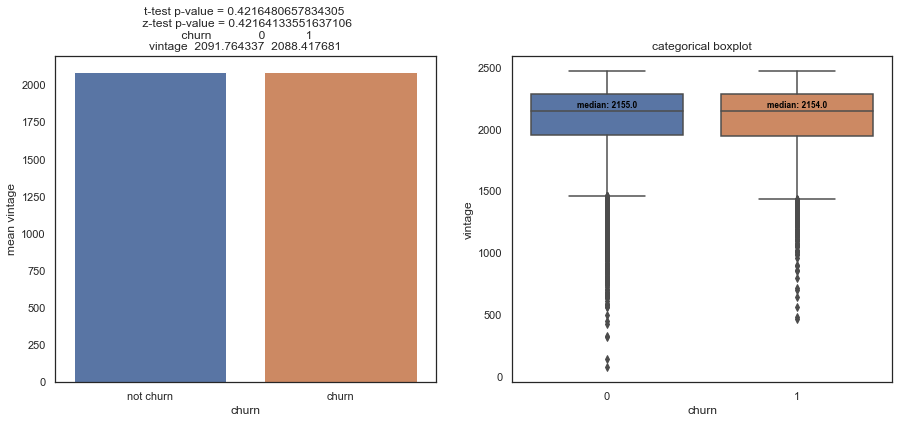

In [241]:
BV_compare_features(data, 'vintage', 'churn', 1)

**Analysis/Insight gathered from Vintage and Churn**
**Hypothesis:** Are vintage customers less likely to churn?<br>
**Results**: <br>
**Observation1:** P_Val values in both Z_Test and T_Test return 0.42 which is significantly greater than 0.05 which tells us that the alternate hypothesis that Vintage has a significant effect on Churn has been proven wrong.<br>
**Observation2:** Mean values of the customers that churn and the customers that did not churn are almost the same which validates the results fom Z_Test and T_Test.<br>
**Observation3:** Boxplot shows similar distribution with outliers on the lower end.<br>
**Conclusion:** We can reject the Alternate Hypothesis (vintage customers are less likely to churn). 

### **Hypothesis 2:** Are **"customers with higher average balance"** less likely to churn?
**Null Hypothesis: M(churn)<M(not_churn)**

#### Average balance in previous quarters

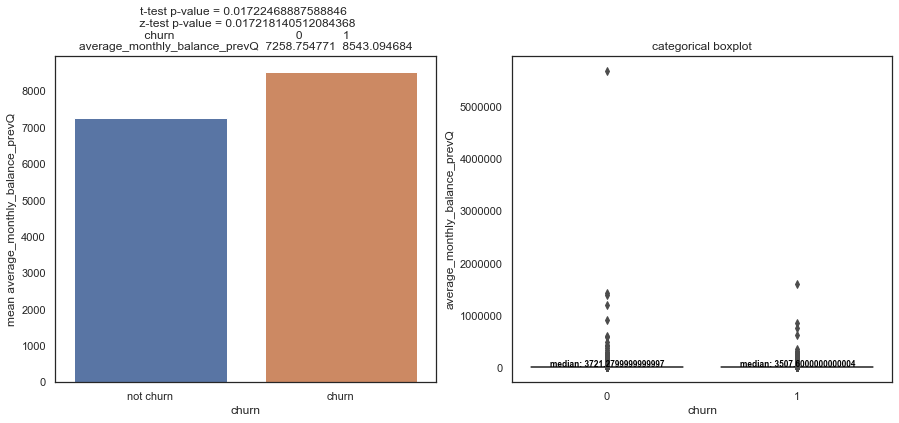

In [242]:
BV_compare_features(data, 'average_monthly_balance_prevQ', 'churn', 1)

**Analysis/Insight gathered from average_monthly_balance_prevQ and Churn**
**Hypothesis:** Are customers with high average monthy balance less likely to churn?<br>

**Observation1:** P_Val values in both Z_Test and T_Test return 0.017 which is significantly lower than 0.05 which tells us that the alternate hypothesis is accepted.<br>
**Observation2:** Mean values of the customers that churn had high average balance than the customers that did not churn, which validates the results from Z_Test and T_Test.<br>
**Conclusion:** We can accept the Alternate Hypothesis (customers with higher average balance in previous quarters are more likely to churn than the customers who have lower average balance). 

#### Average balance in "last to last quarter"

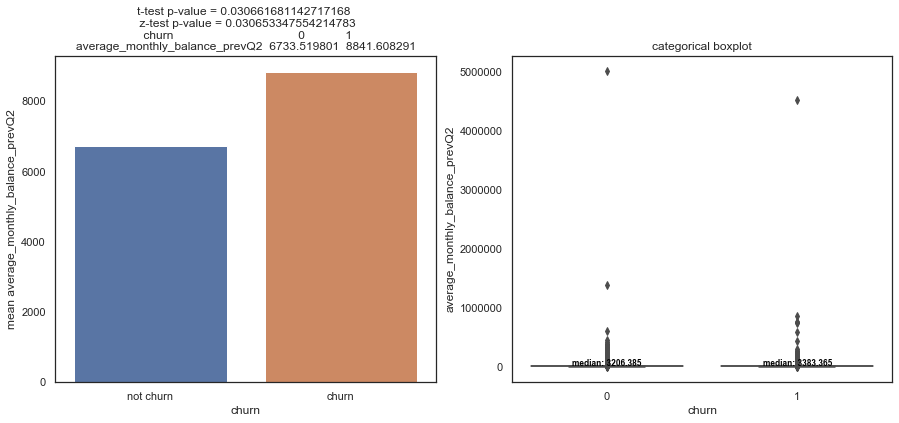

In [243]:
BV_compare_features(data, 'average_monthly_balance_prevQ2', 'churn', 1)

**Analysis/Insight gathered from average_monthly_balance_prevQ2 and Churn**
**Hypothesis:** Are customers with high average monthy balance less likely to churn?<br>

**Observation1:** P_Val values in both Z_Test and T_Test return 0.03 which is significantly lower than 0.05 which tells us that the alternate hypothesis is accepted.<br>
**Observation2:** Mean values of the customers that churn had high average balance than the customers that did not churn, which validates the results from Z_Test and T_Test.<br>
**Conclusion:** We can accept the Alternate Hypothesis (customers with higher average balance in last to last quarter are more likely to churn than the customers who had lower average balance in the same quarters). 

#### previous month/current month

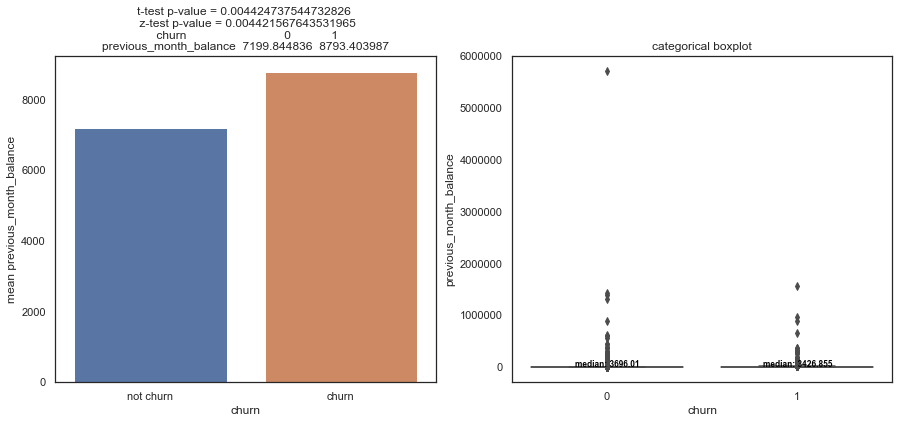

In [244]:
BV_compare_features(data, 'previous_month_balance', 'churn', 1)

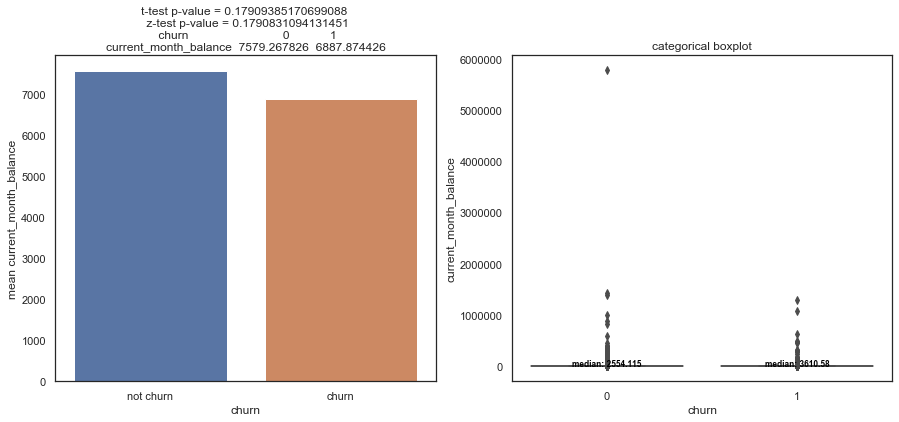

In [245]:
BV_compare_features(data, 'current_month_balance', 'churn', 1)

**Analysis/Insight gathered from average_monthly_balance in current/previous months and Churn**
**Hypothesis:** Are customers with high previous month/current month balance less likely to churn?<br>

**Observation1:** P_Val values in both Z_Test and T_Test vary significantly between previous month and current month which is also validated by the mean values. Which means that the customers who churned had high balance in previous month and their current month balance dropped<br>
**Conclusion:** We can use this intuition to perform another test whether customers who balances drop siginificantly are highly likely to churn. 

### 3. Are customers dropping monthly balance less likely to churn?
**Null Hypothesis: M(drop in balance of churn)<M(drop in balance of not churn)**

In [246]:
difference = data[['churn','previous_month_balance','current_month_balance']]
difference['bal_diff'] = difference['current_month_balance']-difference['previous_month_balance']

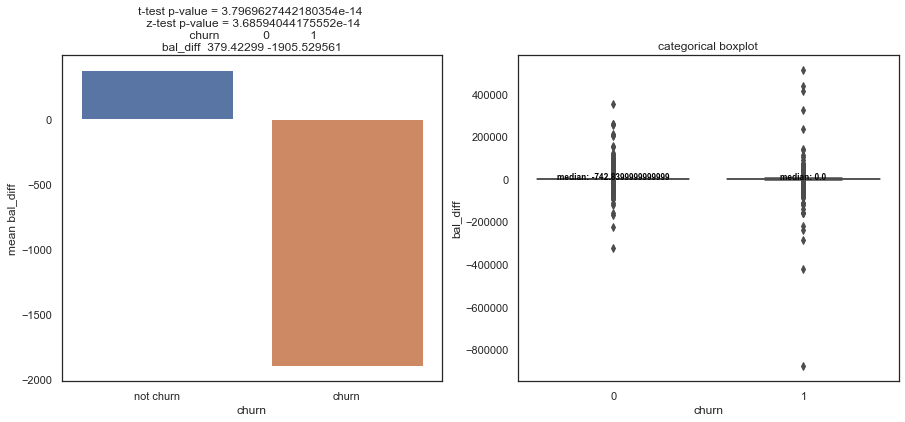

In [247]:
BV_compare_features(difference, 'bal_diff', 'churn', 1)

**Analysis/Insight gathered from customers' dropping balances and Churn**
**Hypothesis:** Are customers with high drop in the balances between previous month and current month less likely to churn?<br>

**Observation1:** P_Val values in both Z_Test and T_Test are signifgicantly lower than 0.05 and the average current month balance dropped significantly which explains that the customers with a significant drop are very highly likely to churn<br>
**Conclusion:** Customers who have a very high drop in the balances are more likely to churn. 

## Bivariate : Categorical-Categorical

#### List of Hypothesis to check under this combination
1.   Are females less likely to churn than males?
2.   Are young customers more likely to churn?
3.   Are customers in the lower income bracket more likely to churn?
4.   Are customers with dependent(s) less likely to churn?
5.   Customers with an average family size less than 4 are more likely to churn?
6.   Customers whose last transaction was more than 6 months ago, do they have higher churn rate?
7.   Possibility that cities and branch code with very few accounts may lead to churning.

**Missing Values** - finding behaviour

**Gender**: 
  *  Do missing values churn more?

**Dependents**:
  *  Do missing values have any relation with churn?

**Occupation:**
   * Do they have some relation with churn?

#### Chi2 test is performed to find out whether the categorical variables are dependent/independent in nature. Chi2 is explained by the following equation below:
    O: Observed Value <br>
    E: Expected Value <br>
$$ \tilde{\chi}^2=\frac{1}{d}\sum_{k=1}^{n} \frac{(O_k - E_k)^2}{E_k} $$

In [248]:
from scipy.stats import chi2_contingency
def BV_Compare_Feature_Categorical(data,compare,category):
    temp_data=data[[compare,category]].copy()
    temp_data_cross_tab=pd.crosstab(temp_data[category],temp_data[compare])
    f_obs = np.array([temp_data_cross_tab.iloc[0].values,
                    temp_data_cross_tab.iloc[1].values])
    
    #print(temp_data_cross_tab)
    #print(f_obs)
    
    chi, p, dof, expected = chi2_contingency(f_obs)
  
    #checking whether results are significant
    if p<0.05:
        sig = True
    else:
        sig = False
    
    #print("p_value:"+str(p))
    #print("chi_value"+str(chi))


    
    plt.figure(figsize = (15,50))
    
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,6))


    g=sns.countplot(x=compare, hue=category, data=temp_data,ax=axes[0])
    g.set_title("chi2-value: {};\np-value = {}\n difference significant? = {}\n".format(round(chi,8),round(p,8),sig))

    
    ax1 = data.groupby(compare)[category].value_counts(normalize=True).unstack(level=-1)
    g=ax1.plot(kind='bar', stacked=True,title=str(ax1),ax=axes[1])
    
    plt.show()
    int_level = data[compare].value_counts()
    
    

### 1. Are females less likely to churn than males?

In [ ]:
BV_Compare_Feature_Categorical(data, 'gender', 'churn')

<Figure size 1080x3600 with 0 Axes>

**Analysis/Insight:**

the difference between the males and females customer churning is significant. Churn and Gender are dependent variables

### 2. Are young customers more likely to churn?

In [ ]:
# segregating customers into segments
churn = data[['churn','age']].copy()
churn['age_group'] = 'str'
churn['age_group'][churn['age']>=80] = 'very old'
churn['age_group'][(churn['age']<80) & (churn['age']>=60)] = 'senior citizen'
churn['age_group'][(churn['age']<60) & (churn['age']>=18)] = 'adult'
churn['age_group'][churn['age']<18] = 'young'

In [ ]:
BV_Compare_Feature_Categorical(churn, 'age_group', 'churn')

**Analysis/Insight**:
Age group has significant effect on the churning rate. Age and Churn are dependent Variables

### 3. Customers from low income bracket more likely to churn

In [ ]:
BV_Compare_Feature_Categorical(data, 'customer_nw_category', 'churn')

**Analysis/Insight:**
Different income brackets have significant effect on the churn rate. Customer Net-Worth and Churn are dependent Variables

### 4,5. Are customers with dependent(s) less likely to churn?

In [ ]:
# segregating dependents into categories
dependents = data[['churn','dependents']][:]
dependents.dropna()
dependents['dep_group'] = None
dependents['dep_group'][dependents['dependents']==0] = 'single'
dependents['dep_group'][(dependents['dependents']>=1) & (dependents['dependents']<=3)] = 'small family'
dependents['dep_group'][(dependents['dependents']>=4) & (dependents['dependents']<=9)] = 'large family'
dependents['dep_group'][(dependents['dependents']>=10)] = 'joint family'

In [ ]:
BV_Compare_Feature_Categorical(dependents, 'dep_group', 'churn')

**Analysis/Insight:** Number of Dependents of customers and Churn are dependent variables

### 6. Customers whose last transaction was more than 6 months ago, they have a higher churn rate?

In [ ]:
# segregating customers whose last transaction was more than 6 onths ago

transaction = data[['churn','moy_ls_tran']]
transaction['moy_ls_tran'] = transaction['moy_ls_tran'].map(lambda x: 'more than 6 months ago' if x<7 else 'within 6 months')

In [ ]:
BV_Compare_Feature_Categorical(transaction,  'moy_ls_tran','churn')

### 7. Possibility that cities and branch code with very few accounts may lead to churning.

#### City

In [ ]:
# getting city codes which have less than 280 (1%) of accounts
total_accounts=data.shape[0]
tmp = data['city'].value_counts()
cities = tmp[tmp<total_accounts*.01].index

In [ ]:
churn_acc = data[['churn','city']][:]
churn_acc['city_cat'] = None
churn_acc['city_cat'][churn_acc['city'].isin(cities[:])] = 'low accounts'
churn_acc['city_cat'][~churn_acc['city'].isin(cities[:])] = 'high accounts'

In [ ]:
BV_Compare_Feature_Categorical(churn_acc, 'city_cat','churn' )

**Analysis/Insight:** Cities contrinuting less than 1% of data has a different churn rate

#### branch_code

In [ ]:
# getting branch codes with more than 1% of total accounts
total_accounts=data.shape[0]
tmp = data['branch_code'].value_counts()
branch = tmp[tmp<total_accounts*.01].index

In [ ]:
# making two segments
churn_acc = data[['churn','branch_code']][:]
churn_acc['branch_cat'] = None
churn_acc['branch_cat'][churn_acc['branch_code'].isin(branch[:])] = 'low accounts'
churn_acc['branch_cat'][~churn_acc['branch_code'].isin(branch[:])] = 'high accounts'

In [ ]:
BV_Compare_Feature_Categorical(churn_acc, 'branch_cat','churn' )

### Missing Values: Gender

In [ ]:
# isolating rows with missing gender
miss_gender = data[['gender','churn']]
miss_gender['missing_gender'] = 'not_missing'
miss_gender['missing_gender'][~miss_gender['gender'].isin(['Male','Female'])] = 'missing value'

In [ ]:
#data_test=pd.read_csv("/Users/vipulbhatia29/JupyterAnalytics/storedata/test_dataset.csv")
#data_test.head()
#BV_Compare_Feature_Categorical(data_test,  'Tenure','Exited')

In [ ]:
BV_Compare_Feature_Categorical(miss_gender, 'missing_gender', 'churn')

**Analysis/Insight:** Missing Gender has no effect on the customer behavior with respect to churn

### Missing Values: Dependents

In [ ]:
# isolating rows with missing gender
miss_dependents = data[['dependents','churn']]
miss_dependents['missing_dependents']=None
miss_dependents['missing_dependents'][miss_dependents['dependents']>-1] = 'not_missing'
miss_dependents['missing_dependents'][miss_dependents['dependents']==-1] = 'missing value'

In [ ]:
BV_Compare_Feature_Categorical(miss_dependents, 'missing_dependents', 'churn')

**Analysis/Insight:** Missing values in dependents have significantly different churning rate than the rest of the data.

In [ ]:
# isolating rows with missing occupation
miss_occupation = data[['occupation','churn']]
miss_occupation['missing_occupation']=None
miss_occupation['missing_occupation'][miss_occupation['occupation'].isnull()]='missing_values'
miss_occupation['missing_occupation'][~(miss_occupation['occupation'].isnull())]='not_missing'

In [ ]:
BV_Compare_Feature_Categorical(miss_occupation, 'missing_occupation', 'churn')

**Analysis/Insight:** Missing values in occupation does not have any significantly different relation with churn rate.

In [ ]:
data['churn'].value_counts(normalize=True)

## Multivariate Analysis
**Objective: Identity the Churning Customers Profile using multiple categorical features**

In [ ]:
data.dtypes[data.dtypes=='category']

In [ ]:
cmap=['Blues','Reds','Greens','Oranges','Purples','Yellows']

### Gender, Occupation, Customer Net worth category with Churn

In [ ]:
table1=data.pivot_table(columns='customer_nw_category',values='churn',index=['gender','occupation'],aggfunc=np.sum)
table1.style.background_gradient(cmap=cmap[0],subset=[1])\
                        .background_gradient(cmap=cmap[1],subset=[2])\
                        .background_gradient(cmap=cmap[2],subset=[3])

In [ ]:
table1 = data.pivot_table(columns='customer_nw_category',values='churn',index=['gender','occupation'],aggfunc=np.mean)*100
table1.style.background_gradient(cmap=cmap[0],subset=[1])\
                        .background_gradient(cmap=cmap[1],subset=[2])\
                        .background_gradient(cmap=cmap[2],subset=[3]).format("{:.2f}")

**Analysis/Insight Gathered:**
1. __Self_Employed__ in both Genders have a high Churn in numbers. However, __Self_Employed__ who lie in __2 net worth category__,(Evident from Table 1) have the highest Churn.
2. Proportion wise for net worth category 1, Approximately 22% __Male customers__ who belong to the __Self-employed__ profession are churning
3. Proportion wise for net worth category 2, 20% __Male customers__ who belong to the __Self-employed__ profession are churning
4. For net worth category 3, Approximately 21% __Male customers__ who belong to the __Self-employed__ profession are churning
6. In all the cases of Customer net worth category, __Self-employed Male customers__ are more likely to churn
7. This would be interesting to dig deeper and find out if the __"Self-employed Male"__ Customers are more churning more 

### Gender, Age, Occupation with Churning Status

Let's use one continuous variable Age, and two categorical variables, Gender, and Occupation to derive insights related to profiles of customers who are churning.
We will have to convert continuous variable into categorical variable for efficiently using Pivot Table. Here we are binning age into three intervals

In [ ]:
age = pd.cut(data['age'], [0, 25, 50, 100])
table1=data.pivot_table('churn', ['gender', age], 'occupation', aggfunc=np.sum)
cols=table1.columns
table1.style.background_gradient(cmap=cmap[0],subset=[cols[0]])\
                        .background_gradient(cmap=cmap[1],subset=[cols[1]])\
                        .background_gradient(cmap=cmap[2],subset=[cols[2]])\
                        .background_gradient(cmap=cmap[3],subset=[cols[3]])\
                        .background_gradient(cmap=cmap[4],subset=[cols[4]]).format("{:.0f}")

In [ ]:
age = pd.cut(data['age'], [0, 25, 50, 100])
table1=data.pivot_table('churn', ['gender', age], 'occupation', aggfunc=np.mean)*100
cols=table1.columns
table1.style.background_gradient(cmap=cmap[0],subset=[cols[0]])\
                        .background_gradient(cmap=cmap[1],subset=[cols[1]])\
                        .background_gradient(cmap=cmap[2],subset=[cols[2]])\
                        .background_gradient(cmap=cmap[3],subset=[cols[3]])\
                        .background_gradient(cmap=cmap[4],subset=[cols[4]]).format("{:.2f}")

* We have created three bins for the age variable dividing age into 3 groups 0-25, 25-50 and 50-100
* Highest number of Customers are churning from __Male category__ who belong to the age group of __(25,50)__ and are professionally __self employed__
* Highest Proportion of Customers are churning from __Male category__ who belong to the age group of __(0,25)__ and are professionally __self employed__
* Here also __Self Employed Male customers__ are churning more than any other combination of categories


### Gender,Age,Occupation and Current Balance with Churning Status

Let's dig deeper by using two continuous variables Age and Current Balance and Two Categorical Variable Gender and Occupation and try to find out the insights related to churning customers profile

In [ ]:
balance = pd.qcut(data['current_balance'], 3)
table1=data.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc='sum')
table1.style.background_gradient(cmap=cmap[4]).format("{:.0f}")

In [ ]:
balance = pd.qcut(data['current_balance'], 3)
table1=data.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc=np.mean)*100
table1.style.background_gradient(cmap=cmap[2]).format("{:.2f}")


* Current balance is divided into 3 quantiles
* It is visible at first look that for __low current balance__ more number of customers are churning
* For the first quantile of current balance, More than __18%__ (overall average churning) of customers are churning and for second and third quantile percentage of churning customers is less than 18%
* In first quantile of current balance, for __self employed profession__ as the age increases for customers, their churning proportion decreases. This means that __Young Self employed Customers__ are more prone to churn 
* There is a visible gap in proportion of Self employed females who lie in the age group of (0,25) and Self employed Males who lie in the same group. __Young Male Self employed customers__ are churning more than young female self employed customers

In [ ]:
def Grouped_Box_Plot(data, cont, cat1, cat2):
    # boxplot
    plt.figure(figsize=(15,6))
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    plt.title('Boxplot')


### Age, Occupation, Churn

In [ ]:
Grouped_Box_Plot(data,'age', 'occupation', 'churn')

We can notice here that 
* For __Self-employed__ profession churning customers are slightly __younger__ than non churning customers
* In the retired occupation for non churning customers, there are many outliers that indicate __young people who retire early are not churning__


### Vintage, Gender, Churn

In [ ]:
Grouped_Box_Plot(data,'vintage','gender', 'churn')